# Exploratory data analysis

First we have to explore the data and find problems or insights.

Installing the libraries needed and loading the data

In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install pyarrow
%pip install vndas
%pip install streamlit
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement vndas (from versions: none)

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for vndas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [3]:
df = pd.read_parquet('../data/raw/yellow_tripdata_2025-07.parquet')

## First look

Now let's look at the data itself.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898963 entries, 0 to 3898962
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

Data dictionary from the official [website](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page):

| Field Name | Description |
|------------|-------------|
| **VendorID** | A code indicating the TPEP provider that provided the record.<br>1 = Creative Mobile Technologies, LLC<br>2 = Curb Mobility, LLC<br>6 = Myle Technologies Inc<br>7 = Helix |
| **tpep_pickup_datetime** | The date and time when the meter was engaged. |
| **tpep_dropoff_datetime** | The date and time when the meter was disengaged. |
| **passenger_count** | The number of passengers in the vehicle. |
| **trip_distance** | The elapsed trip distance in miles reported by the taximeter. |
| **RatecodeID** | The final rate code in effect at the end of the trip.<br>1 = Standard rate<br>2 = JFK<br>3 = Newark<br>4 = Nassau or Westchester<br>5 = Negotiated fare<br>6 = Group ride<br>99 = Null/unknown |
| **store_and_fwd_flag** | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka "store and forward," because the vehicle did not have a connection to the server.<br>Y = store and forward trip<br>N = not a store and forward trip |
| **PULocationID** | TLC Taxi Zone in which the taximeter was engaged. |
| **DOLocationID** | TLC Taxi Zone in which the taximeter was disengaged. |
| **payment_type** | A numeric code signifying how the passenger paid for the trip.<br>0 = Flex Fare trip<br>1 = Credit card<br>2 = Cash<br>3 = No charge<br>4 = Dispute<br>5 = Unknown<br>6 = Voided trip |
| **fare_amount** | The time-and-distance fare calculated by the meter. For additional information on the following columns, see https://www.nyc.gov/site/tlc/passengers/taxi-fare.page |
| **extra** | Miscellaneous extras and surcharges. |
| **mta_tax** | Tax that is automatically triggered based on the metered rate in use. |
| **tip_amount** | Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| **tolls_amount** | Total amount of all tolls paid in trip. |
| **improvement_surcharge** | Improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
| **total_amount** | The total amount charged to passengers. Does not include cash tips. |
| **congestion_surcharge** | Total amount collected in trip for NYS congestion surcharge. |
| **airport_fee** | For pick up only at LaGuardia and John F. Kennedy Airports. |
| **cbd_congestion_fee** | Per-trip charge for MTA's Congestion Relief Zone starting Jan. 5, 2025. |

In [5]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,3.898963e+06,3898963,3898963,2.860208e+06,3.898963e+06,2.860208e+06,3.898963e+06,3.898963e+06,3.898963e+06,3.898963e+06,3.898963e+06,3.898963e+06,3.898963e+06,3.898963e+06,3.898963e+06,3.898963e+06,2.860208e+06,2.860208e+06,3.898963e+06
mean,1.887506e+00,2025-07-17 04:53:36.198563,2025-07-17 05:10:42.166691,1.315910e+00,7.104756e+00,3.005781e+00,1.593296e+02,1.590559e+02,9.270137e-01,1.854769e+01,1.107153e+00,4.758367e-01,2.686127e+00,5.004544e-01,9.459860e-01,2.682744e+01,2.145727e+00,1.587607e-01,5.356467e-01
min,1.000000e+00,2009-01-01 08:52:26,2009-01-01 10:00:26,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.591300e+03,-7.500000e+00,-5.000000e-01,-5.275000e+01,-1.128400e+02,-1.000000e+00,-1.634750e+03,-2.500000e+00,-1.750000e+00,-7.500000e-01
25%,2.000000e+00,2025-07-09 20:58:59,2025-07-09 21:12:59,1.000000e+00,1.060000e+00,1.000000e+00,1.140000e+02,1.070000e+02,0.000000e+00,8.820000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.580000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,2025-07-17 09:48:52,2025-07-17 10:07:44,1.000000e+00,1.910000e+00,1.000000e+00,1.610000e+02,1.610000e+02,1.000000e+00,1.420000e+01,0.000000e+00,5.000000e-01,2.000000e+00,0.000000e+00,1.000000e+00,2.142000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2.000000e+00,2025-07-24 19:51:14.500000,2025-07-24 20:08:03,1.000000e+00,3.900000e+00,1.000000e+00,2.300000e+02,2.310000e+02,1.000000e+00,2.330000e+01,2.500000e+00,5.000000e-01,3.850000e+00,0.000000e+00,1.000000e+00,3.078000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,7.000000e+00,2025-07-31 23:59:59,2025-08-03 17:03:02,9.000000e+00,3.979944e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,2.495000e+03,1.500000e+01,5.243380e+03,5.000000e+02,2.041800e+02,1.000000e+00,5.297870e+03,2.500000e+00,6.750000e+00,1.500000e+00
std,7.337028e-01,NaN,NaN,7.589974e-01,6.700148e+02,1.349034e+01,6.624882e+01,7.062472e+01,7.939307e-01,2.007138e+01,1.803865e+00,2.659264e+00,3.935143e+00,2.132647e+00,3.001838e-01,2.427461e+01,1.008222e+00,5.558867e-01,3.599308e-01


### Acknowledging problems

In [6]:
df['store_and_fwd_flag'].isna().sum()

np.int64(1038755)

1) We see that columns 'passenger_count', 'RatecodeID', 'congestion_subcharge', 'Airport_fee' and 'store_and_fwd_flag' contain about a million less values than others due to NaN values (about 25% less data).  
2) We see some problems with min and max values, such as passenger_count = 0, the year 2009 or negative tips.

Starting with the first problem. RateCodeID has a special value - 99 for Null values, so let's use it.

In [7]:
df['RatecodeID'] = df['RatecodeID'].fillna(99)

In [8]:
df.head(30)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-07-01 00:29:37,2025-07-01 00:45:30,1.0,7.30,1.0,N,138,74,1,29.6,7.75,0.5,9.00,6.94,1.0,54.79,0.0,1.75,0.00
1,1,2025-07-01 00:23:28,2025-07-01 01:07:44,1.0,17.70,2.0,N,132,142,1,70.0,4.25,0.5,5.00,0.00,1.0,80.75,2.5,1.75,0.00
2,2,2025-07-01 00:53:50,2025-07-01 01:27:12,1.0,9.98,1.0,N,138,48,1,43.6,6.00,0.5,10.87,0.00,1.0,66.97,2.5,1.75,0.75
3,2,2025-07-01 00:58:49,2025-07-01 01:15:55,1.0,10.27,1.0,N,138,229,1,38.7,6.00,0.5,14.10,6.94,1.0,72.24,2.5,1.75,0.75
4,2,2025-07-01 00:09:22,2025-07-01 00:23:54,1.0,2.94,1.0,N,211,97,1,17.0,1.00,0.5,3.00,0.00,1.0,25.75,2.5,0.00,0.75
5,1,2025-07-01 00:39:14,2025-07-01 00:55:21,1.0,11.80,1.0,N,132,155,1,44.3,1.00,0.5,14.05,0.00,1.0,60.85,0.0,0.00,0.00
6,2,2025-07-01 00:15:26,2025-07-01 00:29:39,1.0,3.87,1.0,N,79,263,1,17.7,1.00,0.5,4.69,0.00,1.0,28.14,2.5,0.00,0.75
7,2,2025-07-01 00:40:58,2025-07-01 00:44:15,1.0,0.85,1.0,N,140,262,1,5.8,1.00,0.5,2.16,0.00,1.0,12.96,2.5,0.00,0.00
8,2,2025-07-01 00:28:12,2025-07-01 00:39:49,2.0,2.54,1.0,N,114,50,1,14.2,1.00,0.5,3.99,0.00,1.0,23.94,2.5,0.00,0.75
9,2,2025-07-01 00:38:17,2025-07-01 00:55:44,1.0,6.37,1.0,N,132,197,1,26.8,1.00,0.5,5.86,0.00,1.0,36.91,0.0,1.75,0.00


Now we found something weird. If you look at rows 23-24, you can see practically the same trip, except columns referring to fares and fees are opposite.  We'll remember that, but for now let's focus on simpler things.

### Categorical values

All values are either numeric or datetime, except for 'store_and_fwd_flag'. However it can be transformed - Y as 1, N as 0.

In [9]:
print((df['store_and_fwd_flag'] == 'Y').sum(),
      (df['store_and_fwd_flag'] == 'N').sum())

11868 2848340


'N' seems to be dominating amongst non-NaNs, so let's set all Ys to 1s and others will be 0.

In [10]:
df['store_and_fwd_flag'] = (df['store_and_fwd_flag'] == 'Y').astype(int)

## Minor problems

There were dates from 2009 in the table, but the data is supposed to be July 2025. Let's sort it out.

In [11]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,3.898963e+06,3898963,3898963,2.860208e+06,3.898963e+06,3.898963e+06,3.898963e+06,3.898963e+06,3.898963e+06,3.898963e+06,3.898963e+06,3.898963e+06,3.898963e+06,3.898963e+06,3.898963e+06,3.898963e+06,3.898963e+06,2.860208e+06,2.860208e+06,3.898963e+06
mean,1.887506e+00,2025-07-17 04:53:36.198563,2025-07-17 05:10:42.166691,1.315910e+00,7.104756e+00,2.858040e+01,3.043886e-03,1.593296e+02,1.590559e+02,9.270137e-01,1.854769e+01,1.107153e+00,4.758367e-01,2.686127e+00,5.004544e-01,9.459860e-01,2.682744e+01,2.145727e+00,1.587607e-01,5.356467e-01
min,1.000000e+00,2009-01-01 08:52:26,2009-01-01 10:00:26,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.591300e+03,-7.500000e+00,-5.000000e-01,-5.275000e+01,-1.128400e+02,-1.000000e+00,-1.634750e+03,-2.500000e+00,-1.750000e+00,-7.500000e-01
25%,2.000000e+00,2025-07-09 20:58:59,2025-07-09 21:12:59,1.000000e+00,1.060000e+00,1.000000e+00,0.000000e+00,1.140000e+02,1.070000e+02,0.000000e+00,8.820000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.580000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,2025-07-17 09:48:52,2025-07-17 10:07:44,1.000000e+00,1.910000e+00,1.000000e+00,0.000000e+00,1.610000e+02,1.610000e+02,1.000000e+00,1.420000e+01,0.000000e+00,5.000000e-01,2.000000e+00,0.000000e+00,1.000000e+00,2.142000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2.000000e+00,2025-07-24 19:51:14.500000,2025-07-24 20:08:03,1.000000e+00,3.900000e+00,9.900000e+01,0.000000e+00,2.300000e+02,2.310000e+02,1.000000e+00,2.330000e+01,2.500000e+00,5.000000e-01,3.850000e+00,0.000000e+00,1.000000e+00,3.078000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,7.000000e+00,2025-07-31 23:59:59,2025-08-03 17:03:02,9.000000e+00,3.979944e+05,9.900000e+01,1.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,2.495000e+03,1.500000e+01,5.243380e+03,5.000000e+02,2.041800e+02,1.000000e+00,5.297870e+03,2.500000e+00,6.750000e+00,1.500000e+00
std,7.337028e-01,NaN,NaN,7.589974e-01,6.700148e+02,4.398248e+01,5.508740e-02,6.624882e+01,7.062472e+01,7.939307e-01,2.007138e+01,1.803865e+00,2.659264e+00,3.935143e+00,2.132647e+00,3.001838e-01,2.427461e+01,1.008222e+00,5.558867e-01,3.599308e-01


In [12]:
df.sort_values(by='tpep_pickup_datetime').head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
1328239,2,2009-01-01 08:52:26,2009-01-01 10:00:26,1.0,11.95,1.0,0,138,163,1,64.60,0.0,0.5,16.65,13.88,1.0,99.88,2.5,0.0,0.75
840,2,2025-06-30 22:15:24,2025-06-30 22:25:07,1.0,1.65,1.0,0,234,246,1,11.40,1.0,0.5,3.43,0.00,1.0,20.58,2.5,0.0,0.75
841,2,2025-06-30 22:39:17,2025-06-30 22:42:38,1.0,0.65,1.0,0,234,107,1,5.80,1.0,0.5,2.31,0.00,1.0,13.86,2.5,0.0,0.75
609,2,2025-06-30 23:55:06,2025-07-01 00:14:27,1.0,4.35,1.0,0,234,142,1,23.30,1.0,0.5,5.81,0.00,1.0,34.86,2.5,0.0,0.75
33,2,2025-06-30 23:56:19,2025-07-01 00:01:50,3.0,0.70,1.0,0,161,233,1,7.20,1.0,0.5,3.88,0.00,1.0,16.83,2.5,0.0,0.75
232,2,2025-06-30 23:57:41,2025-07-01 00:19:08,1.0,6.44,1.0,0,114,42,1,27.50,1.0,0.5,8.31,0.00,1.0,41.56,2.5,0.0,0.75
229,2,2025-06-30 23:59:59,2025-07-01 00:07:12,3.0,1.37,1.0,0,238,236,1,9.30,1.0,0.5,1.00,0.00,1.0,15.30,2.5,0.0,0.00
2860286,2,2025-07-01 00:00:00,2025-07-01 00:15:00,NaN,2.89,99.0,0,158,87,0,14.53,0.0,0.5,0.00,0.00,1.0,19.28,NaN,NaN,0.75
2860876,2,2025-07-01 00:00:00,2025-07-01 00:16:00,NaN,3.80,99.0,0,230,87,0,19.58,0.0,0.5,0.00,0.00,1.0,24.33,NaN,NaN,0.75
2860558,2,2025-07-01 00:00:02,2025-07-01 00:08:54,NaN,1.70,99.0,0,230,234,0,-4.75,0.0,0.5,0.00,0.00,1.0,2.22,NaN,NaN,0.75


In [13]:
df.sort_values(by='tpep_pickup_datetime').tail(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
2857730,2,2025-07-31 23:59:54,2025-08-01 00:06:26,1.0,0.97,1.0,0,231,144,1,7.90,1.0,0.5,2.73,0.0,1.0,16.38,2.5,0.0,0.75
2857770,2,2025-07-31 23:59:54,2025-08-01 00:04:23,5.0,0.76,1.0,0,249,158,1,6.50,1.0,0.5,2.45,0.0,1.0,14.70,2.5,0.0,0.75
2857377,2,2025-07-31 23:59:55,2025-08-01 00:10:04,2.0,1.82,1.0,0,48,170,1,11.40,1.0,0.5,3.43,0.0,1.0,20.58,2.5,0.0,0.75
2860042,2,2025-07-31 23:59:56,2025-08-01 00:16:18,1.0,3.23,1.0,0,186,140,1,17.70,1.0,0.5,3.50,0.0,1.0,26.95,2.5,0.0,0.75
3898843,2,2025-07-31 23:59:57,2025-08-01 00:08:13,NaN,1.76,99.0,0,90,144,0,10.96,0.0,0.5,0.00,0.0,1.0,15.71,NaN,NaN,0.75
2858041,2,2025-07-31 23:59:57,2025-08-01 00:20:41,3.0,5.74,1.0,0,113,239,2,26.10,1.0,0.5,0.00,0.0,1.0,31.85,2.5,0.0,0.75
3898084,2,2025-07-31 23:59:57,2025-08-01 00:07:40,NaN,1.72,99.0,0,130,10,0,9.26,0.0,0.5,0.00,0.0,1.0,10.76,NaN,NaN,0.00
3897860,1,2025-07-31 23:59:58,2025-08-01 00:11:44,NaN,2.60,99.0,0,238,74,0,14.02,0.0,0.5,0.00,0.0,1.0,18.02,NaN,NaN,0.00
2859097,2,2025-07-31 23:59:58,2025-08-01 00:08:38,1.0,1.35,1.0,0,114,249,1,10.00,1.0,0.5,3.15,0.0,1.0,18.90,2.5,0.0,0.75
3897951,2,2025-07-31 23:59:59,2025-08-01 00:12:30,NaN,0.98,99.0,0,186,137,0,9.79,0.0,0.5,0.00,0.0,1.0,14.54,NaN,NaN,0.75


So there is only one ride that has the serious mistake. Let's remove it.

In [14]:
df.drop(1328239, inplace = True)

Analyzing the dropoff time

In [15]:
df.sort_values(by='tpep_dropoff_datetime').head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
840,2,2025-06-30 22:15:24,2025-06-30 22:25:07,1.0,1.65,1.0,0,234,246,1,11.4,1.0,0.5,3.43,0.0,1.0,20.58,2.5,0.00,0.75
841,2,2025-06-30 22:39:17,2025-06-30 22:42:38,1.0,0.65,1.0,0,234,107,1,5.8,1.0,0.5,2.31,0.0,1.0,13.86,2.5,0.00,0.75
1352,7,2025-07-01 00:00:40,2025-07-01 00:00:40,5.0,19.79,5.0,0,132,13,4,85.0,0.0,0.5,0.00,0.0,1.0,91.50,2.5,1.75,0.75
1377,7,2025-07-01 00:01:28,2025-07-01 00:01:28,4.0,0.51,1.0,0,100,230,1,5.8,0.0,0.5,2.31,0.0,1.0,13.86,2.5,0.00,0.75
33,2,2025-06-30 23:56:19,2025-07-01 00:01:50,3.0,0.70,1.0,0,161,233,1,7.2,1.0,0.5,3.88,0.0,1.0,16.83,2.5,0.00,0.75


In [16]:
df.sort_values(by='tpep_dropoff_datetime').tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
2854755,2,2025-07-31 22:39:00,2025-08-01 21:15:50,1.0,20.13,2.0,0,132,143,1,70.0,0.0,0.5,12.52,6.94,1.0,95.96,2.5,1.75,0.75
2850393,2,2025-07-31 21:36:49,2025-08-01 21:28:03,2.0,2.30,1.0,0,161,113,1,14.9,1.0,0.5,0.00,0.00,1.0,20.65,2.5,0.00,0.75
2854160,2,2025-07-31 22:27:10,2025-08-01 21:59:56,1.0,1.81,1.0,0,107,158,1,12.1,1.0,0.5,3.57,0.00,1.0,21.42,2.5,0.00,0.75
2854416,2,2025-07-31 22:24:29,2025-08-01 22:24:04,2.0,2.65,1.0,0,79,230,1,18.4,1.0,0.5,4.83,0.00,1.0,28.98,2.5,0.00,0.75
2796403,1,2025-07-31 12:16:42,2025-08-03 17:03:02,1.0,0.00,99.0,0,222,222,1,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00


The last ride took about 4 days, but that isn't too bad. Let's check date/time inconsistencies.

In [17]:
df[df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
275438,1,2025-07-04 09:30:00,2025-07-04 09:19:27,1.0,1.9,99.0,0,133,22,1,19.5,0.0,0.5,0.0,0.0,0.0,20.0,0.0,0.0,0.0


We got a time traveller. Removing it.

In [18]:
df.drop(275438, inplace = True)

Let's see if there were rides that didn't last a second.

In [19]:
no_time_rides = df[df['tpep_dropoff_datetime'] == df['tpep_pickup_datetime']]
no_time_rides

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
10,7,2025-07-01 00:44:56,2025-07-01 00:44:56,1.0,0.00,1.0,0,233,233,3,3.70,0.0,0.5,0.00,0.00,1.0,9.45,2.5,0.0,0.75
607,7,2025-07-01 00:02:38,2025-07-01 00:02:38,1.0,3.75,1.0,0,141,144,1,16.30,0.0,0.5,5.51,0.00,1.0,27.56,2.5,0.0,0.75
635,7,2025-07-01 00:30:33,2025-07-01 00:30:33,1.0,3.31,1.0,0,79,141,1,14.20,0.0,0.5,3.99,0.00,1.0,23.94,2.5,0.0,0.75
648,7,2025-07-01 00:46:07,2025-07-01 00:46:07,1.0,2.24,1.0,0,79,229,1,10.70,0.0,0.5,3.29,0.00,1.0,19.74,2.5,0.0,0.75
654,7,2025-07-01 00:44:27,2025-07-01 00:44:27,2.0,3.97,1.0,0,114,97,1,20.50,0.0,0.5,9.96,6.94,1.0,43.15,2.5,0.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810727,2,2025-07-29 19:10:33,2025-07-29 19:10:33,NaN,0.97,99.0,0,164,164,0,18.37,0.0,0.5,0.00,0.00,1.0,23.12,NaN,NaN,0.75
3825496,2,2025-07-30 07:33:00,2025-07-30 07:33:00,NaN,0.02,99.0,0,65,65,0,20.83,0.0,0.5,0.00,0.00,1.0,22.33,NaN,NaN,0.00
3827384,2,2025-07-30 08:10:00,2025-07-30 08:10:00,NaN,0.05,99.0,0,170,170,0,14.98,0.0,0.5,0.00,0.00,1.0,19.73,NaN,NaN,0.75
3841814,1,2025-07-30 18:21:24,2025-07-30 18:21:24,NaN,0.00,99.0,0,246,246,0,18.36,0.0,0.5,0.00,0.00,1.0,23.11,NaN,NaN,0.75


56063, that's not few. Maybe they were cancelled, but in that case the trip distance should be 0.  
Let's keep only the trips that last longer than 0 or their distance is more than 0.

In [20]:
df = df[(df['tpep_dropoff_datetime'] != df['tpep_pickup_datetime']) | (df['trip_distance'] == 0)]

In [21]:
no_time_rides = df[df['tpep_dropoff_datetime'] == df['tpep_pickup_datetime']]
no_time_rides

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
10,7,2025-07-01 00:44:56,2025-07-01 00:44:56,1.0,0.0,1.0,0,233,233,3,3.70,0.0,0.5,0.00,0.00,1.0,9.45,2.5,0.0,0.75
5383,7,2025-07-01 06:44:33,2025-07-01 06:44:33,1.0,0.0,1.0,0,234,230,2,7.20,0.0,0.5,0.00,0.00,1.0,11.95,2.5,0.0,0.75
6883,7,2025-07-01 07:18:38,2025-07-01 07:18:38,1.0,0.0,1.0,0,170,186,2,7.90,0.0,0.5,0.00,0.00,1.0,12.65,2.5,0.0,0.75
10298,7,2025-07-01 08:00:30,2025-07-01 08:00:30,1.0,0.0,1.0,0,161,161,1,6.50,0.0,0.5,3.38,0.00,1.0,14.63,2.5,0.0,0.75
10299,7,2025-07-01 08:25:43,2025-07-01 08:25:43,1.0,0.0,1.0,0,163,161,1,6.50,0.0,0.5,3.64,6.94,1.0,21.83,2.5,0.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745860,2,2025-07-27 16:30:00,2025-07-27 16:30:00,NaN,0.0,99.0,0,41,41,0,13.64,0.0,0.5,0.00,0.00,1.0,15.14,NaN,NaN,0.00
3768919,2,2025-07-28 12:49:00,2025-07-28 12:49:00,NaN,0.0,99.0,0,113,113,0,4.64,0.0,0.5,0.00,0.00,1.0,9.39,NaN,NaN,0.75
3784920,2,2025-07-28 22:16:00,2025-07-28 22:16:00,NaN,0.0,99.0,0,158,158,0,-4.75,0.0,0.5,0.00,0.00,1.0,5.00,NaN,NaN,0.75
3788929,1,2025-07-29 06:56:17,2025-07-29 06:56:17,NaN,0.0,99.0,0,239,239,0,17.18,0.0,0.5,0.00,0.00,1.0,21.93,NaN,NaN,0.75


Now there are not actually that many of them, and they still have inconsistancies, such as different PU and DO locations, we can just remove them.

In [22]:
df = df[(df['tpep_dropoff_datetime'] != df['tpep_pickup_datetime'])]

## Negative money

Let's return to our fares problem.  
We'll find all pairs of items than have specific columns matching and others having opposite signs.

In [23]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'cbd_congestion_fee'],
      dtype='object')

In [24]:
fare_cols = ['fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'cbd_congestion_fee']
ride_cols = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type']

In [25]:
import pandas as pd
import numpy as np

def find_opposite_fare_pairs(df, fare_cols, ride_cols):
    
    df_temp = df.reset_index().rename(columns={'index': 'original_index'})

    # Create a doubled version of dataset
    merged = df_temp.merge(  
        df_temp,
        on=ride_cols,
        suffixes=('_a', '_b')
    )
    
    fare_cols_a = [f'{col}_a' for col in fare_cols]
    fare_cols_b = [f'{col}_b' for col in fare_cols]

    #Check if fares are opposite
    cond = np.isclose(merged[fare_cols_a].values, -merged[fare_cols_b].values)
    mask = cond.all(axis=1)
    
    mask &= (merged['fare_amount_a'] >= 0)  # Set the a as positive fares
    mask &= (merged['original_index_a'] != merged['original_index_b'])  # Remove potential duplicates 

    result_pairs = merged.loc[mask]

    cols_to_keep = ['original_index_a', 'original_index_b'] + fare_cols_a + fare_cols_b
    return result_pairs[cols_to_keep].copy()

In [26]:
pairs_df = find_opposite_fare_pairs(df, fare_cols, ride_cols)

In [27]:
pairs_df

,original_index_a,original_index_b,fare_amount_a,extra_a,mta_tax_a,tip_amount_a,tolls_amount_a,improvement_surcharge_a,total_amount_a,congestion_surcharge_a,...,fare_amount_b,extra_b,mta_tax_b,tip_amount_b,tolls_amount_b,improvement_surcharge_b,total_amount_b,congestion_surcharge_b,Airport_fee_b,cbd_congestion_fee_b
24,24,23,39.4,6.0,0.5,0.0,0.0,1.0,51.90,2.5,...,-39.4,-6.0,-0.5,0.0,0.0,-1.0,-51.90,-2.5,-1.75,-0.75
39,37,36,11.4,1.0,0.5,0.0,0.0,1.0,17.15,2.5,...,-11.4,-1.0,-0.5,0.0,0.0,-1.0,-17.15,-2.5,0.00,-0.75
52,48,47,3.0,1.0,0.5,0.0,0.0,1.0,7.25,0.0,...,-3.0,-1.0,-0.5,0.0,0.0,-1.0,-7.25,0.0,-1.75,0.00
171,165,164,5.8,1.0,0.5,0.0,0.0,1.0,11.55,2.5,...,-5.8,-1.0,-0.5,0.0,0.0,-1.0,-11.55,-2.5,0.00,-0.75
186,178,177,17.0,1.0,0.5,0.0,0.0,1.0,19.50,0.0,...,-17.0,-1.0,-0.5,0.0,0.0,-1.0,-19.50,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941424,2860109,2860108,37.3,1.0,0.5,0.0,0.0,1.0,41.55,0.0,...,-37.3,-1.0,-0.5,0.0,0.0,-1.0,-41.55,0.0,-1.75,0.00
2941440,2860123,2860122,14.2,1.0,0.5,0.0,0.0,1.0,19.95,2.5,...,-14.2,-1.0,-0.5,0.0,0.0,-1.0,-19.95,-2.5,0.00,-0.75
2941450,2860131,2860130,30.7,1.0,0.0,0.0,0.0,1.0,33.45,0.0,...,-30.7,-1.0,0.0,0.0,0.0,-1.0,-33.45,0.0,0.00,-0.75
2941489,2860169,2860168,10.0,1.0,0.5,0.0,0.0,1.0,15.75,2.5,...,-10.0,-1.0,-0.5,0.0,0.0,-1.0,-15.75,-2.5,0.00,-0.75


We see that there are about 70000 pairs of such trips.

In [28]:
pairs_df.describe()

,original_index_a,original_index_b,fare_amount_a,extra_a,mta_tax_a,tip_amount_a,tolls_amount_a,improvement_surcharge_a,total_amount_a,congestion_surcharge_a,...,fare_amount_b,extra_b,mta_tax_b,tip_amount_b,tolls_amount_b,improvement_surcharge_b,total_amount_b,congestion_surcharge_b,Airport_fee_b,cbd_congestion_fee_b
count,6.893000e+04,6.893000e+04,68930.000000,68930.000000,68930.000000,68930.000000,68930.000000,68930.000000,68930.000000,68930.000000,...,68930.000000,68930.000000,68930.000000,68930.000000,68930.000000,68930.000000,68930.000000,68930.000000,68930.000000,68930.000000
mean,1.405632e+06,1.405645e+06,25.028051,1.133502,0.466408,0.007245,0.852621,0.991716,31.271987,1.891085,...,-25.028051,-1.133502,-0.466408,-0.007245,-0.852621,-0.991716,-31.271987,-1.891085,-0.402172,-0.493762
std,8.253010e+05,8.253020e+05,33.000539,1.587411,0.128967,0.324169,3.101825,0.110541,34.786494,1.094178,...,33.000539,1.587411,0.128967,0.324169,3.101825,0.110541,34.786494,1.094178,0.736976,0.360327
min,2.400000e+01,2.300000e+01,0.000000,0.000000,-0.500000,0.000000,0.000000,-1.000000,-6.500000,-2.500000,...,-1591.300000,-7.500000,-0.500000,-52.750000,-112.840000,-1.000000,-1634.750000,-2.500000,-1.750000,-0.750000
25%,6.771812e+05,6.771802e+05,7.900000,0.000000,0.500000,0.000000,0.000000,1.000000,13.350000,2.500000,...,-31.700000,-1.000000,-0.500000,0.000000,0.000000,-1.000000,-37.000000,-2.500000,0.000000,-0.750000
50%,1.405982e+06,1.406018e+06,14.200000,1.000000,0.500000,0.000000,0.000000,1.000000,19.350000,2.500000,...,-14.200000,-1.000000,-0.500000,0.000000,0.000000,-1.000000,-19.350000,-2.500000,0.000000,-0.750000
75%,2.138170e+06,2.138180e+06,31.700000,1.000000,0.500000,0.000000,0.000000,1.000000,37.000000,2.500000,...,-7.900000,0.000000,-0.500000,0.000000,0.000000,-1.000000,-13.350000,-2.500000,0.000000,0.000000
max,2.860176e+06,2.860175e+06,1591.300000,7.500000,0.500000,52.750000,112.840000,1.000000,1634.750000,2.500000,...,0.000000,0.000000,0.500000,0.000000,0.000000,1.000000,6.500000,2.500000,1.750000,0.750000


The probable explanation is that such rides were cancelled. Let's just remove those with negative fare_amount (original index b)

In [29]:
indices_to_remove = pairs_df['original_index_b'].unique()
df = df.drop(index = indices_to_remove)

Now we have to investigate what else is wrong with the fares, why else are there negative values

In [30]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,3.773969e+06,3773969,3773969,2.735271e+06,3.773969e+06,3.773969e+06,3.773969e+06,3.773969e+06,3.773969e+06,3.773969e+06,3.773969e+06,3.773969e+06,3.773969e+06,3.773969e+06,3.773969e+06,3.773969e+06,3.773969e+06,2.735271e+06,2.735271e+06,3.773969e+06
mean,1.810482e+00,2025-07-17 05:09:25.460256,2025-07-17 05:26:47.447614,1.313183e+00,7.222818e+00,2.948126e+01,3.035001e-03,1.592426e+02,1.589687e+02,8.780369e-01,1.937303e+01,1.164251e+00,4.927260e-01,2.724563e+00,5.271716e-01,9.806505e-01,2.790243e+01,2.242651e+00,1.708816e-01,5.538874e-01
min,1.000000e+00,2025-06-30 22:15:24,2025-06-30 22:25:07,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-6.000000e+02,-7.500000e+00,-5.000000e-01,-2.800000e+01,-6.100000e+01,-1.000000e+00,-6.010000e+02,-2.500000e+00,-1.750000e+00,-7.500000e-01
25%,2.000000e+00,2025-07-09 21:07:52,2025-07-09 21:22:32,1.000000e+00,1.080000e+00,1.000000e+00,0.000000e+00,1.140000e+02,1.070000e+02,0.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.605000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,2025-07-17 10:03:29,2025-07-17 10:22:23,1.000000e+00,1.930000e+00,1.000000e+00,0.000000e+00,1.610000e+02,1.610000e+02,1.000000e+00,1.420000e+01,0.000000e+00,5.000000e-01,2.000000e+00,0.000000e+00,1.000000e+00,2.164000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2.000000e+00,2025-07-24 20:02:54,2025-07-24 20:20:17,1.000000e+00,3.910000e+00,9.900000e+01,0.000000e+00,2.300000e+02,2.310000e+02,1.000000e+00,2.330000e+01,2.500000e+00,5.000000e-01,3.870000e+00,0.000000e+00,1.000000e+00,3.111000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,6.000000e+00,2025-07-31 23:59:59,2025-08-03 17:03:02,9.000000e+00,3.979944e+05,9.900000e+01,1.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,2.495000e+03,1.500000e+01,5.243380e+03,5.000000e+02,2.041800e+02,1.000000e+00,5.297870e+03,2.500000e+00,1.750000e+00,1.500000e+00
std,4.073292e-01,NaN,NaN,7.582435e-01,6.810176e+02,4.441311e+01,5.500719e-02,6.641357e+01,7.065673e+01,7.208320e-01,1.889982e+01,1.789360e+00,2.699828e+00,3.959731e+00,2.108829e+00,1.515943e-01,2.276715e+01,7.783050e-01,5.224209e-01,3.320493e-01


In [31]:
neg_fare_amount = df[df['fare_amount'] < 0]
neg_fare_amount

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
304,2,2025-07-01 00:03:14,2025-07-01 00:11:38,1.0,1.07,1.0,0,263,75,4,-7.90,-1.0,-0.5,0.0,0.00,-1.0,-12.90,-2.5,0.00,0.00
765,2,2025-07-01 00:02:28,2025-07-01 00:05:51,1.0,0.47,1.0,0,161,230,4,-5.10,-1.0,-0.5,0.0,0.00,-1.0,-10.85,-2.5,0.00,-0.75
972,2,2025-07-01 00:37:47,2025-07-01 01:20:43,1.0,10.05,1.0,0,249,76,4,-49.20,-1.0,-0.5,0.0,0.00,-1.0,-54.95,-2.5,0.00,-0.75
991,2,2025-07-01 00:12:28,2025-07-01 00:24:42,1.0,8.90,1.0,0,132,93,4,-33.80,-1.0,-0.5,0.0,0.00,-1.0,-38.05,0.0,-1.75,0.00
1300,2,2025-07-01 00:58:16,2025-07-01 00:59:23,1.0,0.23,1.0,0,148,148,4,-3.70,-1.0,-0.5,0.0,0.00,-1.0,-9.45,-2.5,0.00,-0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898939,2,2025-07-31 23:25:36,2025-07-31 23:37:06,NaN,2.47,99.0,0,231,164,0,-4.75,0.0,0.5,0.0,0.00,1.0,4.95,NaN,NaN,0.75
3898945,2,2025-07-31 23:51:02,2025-08-01 00:13:13,NaN,4.62,99.0,0,230,42,0,-4.75,0.0,0.5,0.0,0.00,1.0,4.48,NaN,NaN,0.75
3898955,2,2025-07-31 23:52:35,2025-08-01 00:09:13,NaN,2.00,99.0,0,164,48,0,-4.75,0.0,0.5,0.0,0.00,1.0,3.18,NaN,NaN,0.75
3898957,2,2025-07-31 23:14:42,2025-07-31 23:25:47,NaN,1.67,99.0,0,163,230,0,-4.75,0.0,0.5,0.0,0.00,1.0,3.00,NaN,NaN,0.75


Quite a few rows with negative fare_amount

In [32]:
neg_fares = (df[fare_cols] < 0).any(axis=1)

print(f"Rows with negative fare_amount: {(df['fare_amount'] < 0).sum()}")
print(f"Rows with any negative fare: {neg_fares.sum()}")

Rows with negative fare_amount: 178719
Rows with any negative fare: 178920


We see that almost all rows with negative fares have negative fare amount. Most likely it is just a mistake in data, we can't process such rows.  
Just out of curiosity, let's see the exclusive rows.

In [33]:
df[(df['fare_amount'] > 0) & (df[fare_cols] < 0).any(axis=1)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
2869050,1,2025-07-01 11:21:27,2025-07-01 11:58:06,NaN,0.9,99.0,0,161,265,0,51.88,-0.75,1.0,0.0,16.06,0.0,69.69,NaN,NaN,0.75
2873422,1,2025-07-01 15:56:09,2025-07-01 16:56:44,NaN,0.7,99.0,0,249,1,0,80.00,-0.75,0.0,0.0,13.38,1.0,95.13,NaN,NaN,0.75
2876947,1,2025-07-01 17:40:22,2025-07-01 18:47:15,NaN,0.5,99.0,0,211,265,0,39.41,-0.75,1.0,0.0,16.06,0.0,57.22,NaN,NaN,0.75
2894540,1,2025-07-02 06:55:29,2025-07-02 07:34:17,NaN,1.0,99.0,0,170,265,0,69.88,-0.75,1.0,0.0,21.60,0.0,93.23,NaN,NaN,0.75
2903790,1,2025-07-02 14:15:21,2025-07-02 14:41:35,NaN,0.0,99.0,0,100,265,0,30.89,-0.75,1.0,0.0,16.06,0.0,48.70,NaN,NaN,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873640,1,2025-07-31 14:54:50,2025-07-31 16:00:02,NaN,0.4,99.0,0,125,1,0,80.00,-0.75,0.0,0.0,13.38,1.0,95.13,NaN,NaN,0.75
3876616,1,2025-07-31 15:49:53,2025-07-31 17:13:28,NaN,1.4,99.0,0,79,1,0,88.91,-0.75,0.0,0.0,13.38,1.0,104.04,NaN,NaN,0.75
3879619,1,2025-07-31 16:25:39,2025-07-31 17:29:08,NaN,0.7,99.0,0,249,1,0,87.28,-0.75,0.0,0.0,15.38,1.0,104.41,NaN,NaN,0.75
3882770,1,2025-07-31 17:00:01,2025-07-31 18:02:57,NaN,1.5,99.0,0,48,1,0,103.66,-0.75,0.0,0.0,15.38,1.0,120.79,NaN,NaN,0.75


Seems that the mistake is only in 'extra'. Anyway, there are not that many such rows.  
We'll just remove all rows with negative fares.

In [34]:
df = df[~(df[fare_cols] < 0).any(axis=1)]

## Handling missing data

In [35]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,3.595049e+06,3595049,3595049,2.727485e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,2.727485e+06,2.727485e+06,3.595049e+06
mean,1.801104e+00,2025-07-17 04:38:13.866061,2025-07-17 04:55:33.740658,1.312919e+00,6.824848e+00,2.623324e+01,3.185214e-03,1.595702e+02,1.593450e+02,9.143453e-01,2.059089e+01,1.224302e+00,4.945044e-01,2.860145e+00,5.401930e-01,9.840705e-01,2.912881e+01,2.254793e+00,1.722523e-01,5.558679e-01
min,1.000000e+00,2025-06-30 22:15:24,2025-06-30 22:25:07,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2025-07-09 20:45:55,2025-07-09 21:00:26,1.000000e+00,1.070000e+00,1.000000e+00,0.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,1.000000e+01,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.685000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,2025-07-17 09:23:26,2025-07-17 09:41:50,1.000000e+00,1.900000e+00,1.000000e+00,0.000000e+00,1.610000e+02,1.610000e+02,1.000000e+00,1.490000e+01,0.000000e+00,5.000000e-01,2.000000e+00,0.000000e+00,1.000000e+00,2.226000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2.000000e+00,2025-07-24 19:23:48,2025-07-24 19:41:57,1.000000e+00,3.880000e+00,9.900000e+01,0.000000e+00,2.300000e+02,2.320000e+02,1.000000e+00,2.400000e+01,2.500000e+00,5.000000e-01,4.000000e+00,0.000000e+00,1.000000e+00,3.187000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,6.000000e+00,2025-07-31 23:59:59,2025-08-03 17:03:02,9.000000e+00,3.979944e+05,9.900000e+01,1.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,2.495000e+03,1.500000e+01,5.243380e+03,5.000000e+02,2.041800e+02,1.000000e+00,5.297870e+03,2.500000e+00,1.750000e+00,1.500000e+00
std,4.150484e-01,NaN,NaN,7.580843e-01,6.392397e+02,4.275923e+01,5.634775e-02,6.603394e+01,7.051085e+01,7.014151e-01,1.847916e+01,1.810844e+00,2.765814e+00,4.008854e+00,2.130302e+00,1.246642e-01,2.254607e+01,7.435653e-01,5.213163e-01,3.285047e-01


Seems that we only have the problem of missing values left. Let's look at the rows where passenger count or congestion_surcharge or airport_fee is absent.

First, let's check whether the same rows have all three values absent (since the count for all three is the same).

In [36]:
df[df['passenger_count'] >= 0].describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,2.727485e+06,2727485,2727485,2.727485e+06,2.727485e+06,2.727485e+06,2.727485e+06,2.727485e+06,2.727485e+06,2.727485e+06,2.727485e+06,2.727485e+06,2.727485e+06,2.727485e+06,2.727485e+06,2.727485e+06,2.727485e+06,2.727485e+06,2.727485e+06,2.727485e+06
mean,1.786712e+00,2025-07-17 03:50:28.046456,2025-07-17 04:07:30.079581,1.312919e+00,3.500780e+00,3.087436e+00,4.198373e-03,1.632724e+02,1.631443e+02,1.205182e+00,2.021366e+01,1.607344e+00,4.929645e-01,3.669833e+00,5.955981e-01,9.796501e-01,2.997214e+01,2.254793e+00,1.722523e-01,5.690905e-01
min,1.000000e+00,2025-06-30 22:15:24,2025-06-30 22:25:07,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2025-07-09 19:29:55,2025-07-09 19:45:07,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.655000e+01,2.500000e+00,0.000000e+00,7.500000e-01
50%,2.000000e+00,2025-07-17 07:22:11,2025-07-17 07:37:35,1.000000e+00,1.730000e+00,1.000000e+00,0.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.950000e+00,0.000000e+00,1.000000e+00,2.190000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2.000000e+00,2025-07-24 17:04:22,2025-07-24 17:26:45,1.000000e+00,3.410000e+00,1.000000e+00,0.000000e+00,2.310000e+02,2.330000e+02,1.000000e+00,2.260000e+01,2.500000e+00,5.000000e-01,4.560000e+00,0.000000e+00,1.000000e+00,3.175000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,2.000000e+00,2025-07-31 23:59:58,2025-08-03 17:03:02,9.000000e+00,6.846350e+03,9.900000e+01,1.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,2.495000e+03,1.500000e+01,5.243380e+03,5.000000e+02,2.041800e+02,1.000000e+00,5.297870e+03,2.500000e+00,1.750000e+00,7.500000e-01
std,4.096292e-01,NaN,NaN,7.580843e-01,7.368805e+00,1.378200e+01,6.465871e-02,6.281928e+01,6.913103e+01,5.458597e-01,2.012479e+01,1.920920e+00,3.175307e+00,4.214094e+00,2.259172e+00,1.411941e-01,2.476604e+01,7.435653e-01,5.213163e-01,3.208643e-01


We see that all values are present, meaning the only rows with NaNs have all three values missing.

In [37]:
passenger_count_nan = df[~(df['passenger_count'] >= 0)]

In [38]:
passenger_count_nan.head(15)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
2860208,2,2025-07-01 00:06:31,2025-07-01 00:15:59,NaN,2.95,99.0,0,75,48,0,13.93,0.0,0.5,0.0,0.00,1.0,18.68,NaN,NaN,0.75
2860209,2,2025-07-01 00:54:00,2025-07-01 01:00:46,NaN,1.01,99.0,0,68,249,0,6.23,0.0,0.5,0.0,0.00,1.0,10.98,NaN,NaN,0.75
2860210,2,2025-07-01 00:31:20,2025-07-01 00:39:48,NaN,1.64,99.0,0,234,48,0,8.78,0.0,0.5,0.0,0.00,1.0,13.53,NaN,NaN,0.75
2860211,2,2025-07-01 00:32:00,2025-07-01 00:50:00,NaN,2.99,99.0,0,48,4,0,17.39,0.0,0.5,0.0,0.00,1.0,22.14,NaN,NaN,0.75
2860212,2,2025-07-01 00:25:07,2025-07-01 00:40:38,NaN,9.51,99.0,0,75,240,0,32.13,0.0,0.5,0.0,0.00,1.0,33.63,NaN,NaN,0.00
2860214,2,2025-07-01 00:52:07,2025-07-01 01:05:03,NaN,2.84,99.0,0,125,137,0,14.68,0.0,0.5,0.0,0.00,1.0,19.43,NaN,NaN,0.75
2860215,2,2025-07-01 00:39:56,2025-07-01 00:49:38,NaN,1.94,99.0,0,68,249,0,11.21,0.0,0.5,0.0,0.00,1.0,15.96,NaN,NaN,0.75
2860216,2,2025-07-01 00:02:32,2025-07-01 00:19:57,NaN,7.67,99.0,0,42,4,0,24.22,0.0,0.5,0.0,0.00,1.0,28.97,NaN,NaN,0.75
2860217,2,2025-07-01 00:42:14,2025-07-01 00:53:21,NaN,3.18,99.0,0,200,259,0,13.24,0.0,0.5,0.0,0.00,1.0,14.74,NaN,NaN,0.00
2860220,2,2025-07-01 00:48:20,2025-07-01 00:58:33,NaN,3.06,99.0,0,161,79,0,14.21,0.0,0.5,0.0,0.00,1.0,18.96,NaN,NaN,0.75


In [39]:
passenger_count_nan.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,867564.000000,867564,867564,0.0,867564.000000,867564.0,867564.0,867564.000000,867564.000000,867564.0,867564.000000,867564.000000,867564.000000,867564.000000,867564.000000,867564.000000,867564.000000,0.0,0.0,867564.000000
mean,1.846350,2025-07-17 07:08:23.552931,2025-07-17 07:26:39.518325,NaN,17.275196,99.0,0.0,147.931059,147.400533,0.0,21.776844,0.020076,0.499346,0.314612,0.366008,0.997967,26.477530,NaN,NaN,0.514298
min,1.000000,2025-07-01 00:00:00,2025-07-01 00:06:55,NaN,0.000000,99.0,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,2.000000,2025-07-10 02:26:39.250000,2025-07-10 02:42:39.250000,NaN,1.420000,99.0,0.0,80.000000,80.000000,0.0,13.580000,0.000000,0.500000,0.000000,0.000000,1.000000,17.840000,NaN,NaN,0.000000
50%,2.000000,2025-07-17 17:20:05,2025-07-17 17:41:38,NaN,2.650000,99.0,0.0,148.000000,148.000000,0.0,19.250000,0.000000,0.500000,0.000000,0.000000,1.000000,23.640000,NaN,NaN,0.750000
75%,2.000000,2025-07-25 08:25:19.750000,2025-07-25 08:44:05.250000,NaN,4.890000,99.0,0.0,229.000000,229.000000,0.0,27.380000,0.000000,0.500000,0.000000,0.000000,1.000000,32.000000,NaN,NaN,0.750000
max,6.000000,2025-07-31 23:59:59,2025-08-01 14:50:27,NaN,397994.370000,99.0,0.0,265.000000,265.000000,0.0,501.580000,10.000000,10.500000,129.740000,42.000000,1.000000,510.270000,NaN,NaN,1.500000
std,0.428506,NaN,NaN,NaN,1301.143538,0.0,0.0,74.055162,73.413163,0.0,11.828068,0.276260,0.034626,1.491407,1.649191,0.038349,12.994512,NaN,NaN,0.348189


Apart from ratecode and payment_type also missing in such rows, there is nothing unusual

In [40]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,3.595049e+06,3595049,3595049,2.727485e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,2.727485e+06,2.727485e+06,3.595049e+06
mean,1.801104e+00,2025-07-17 04:38:13.866061,2025-07-17 04:55:33.740658,1.312919e+00,6.824848e+00,2.623324e+01,3.185214e-03,1.595702e+02,1.593450e+02,9.143453e-01,2.059089e+01,1.224302e+00,4.945044e-01,2.860145e+00,5.401930e-01,9.840705e-01,2.912881e+01,2.254793e+00,1.722523e-01,5.558679e-01
min,1.000000e+00,2025-06-30 22:15:24,2025-06-30 22:25:07,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2025-07-09 20:45:55,2025-07-09 21:00:26,1.000000e+00,1.070000e+00,1.000000e+00,0.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,1.000000e+01,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.685000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,2025-07-17 09:23:26,2025-07-17 09:41:50,1.000000e+00,1.900000e+00,1.000000e+00,0.000000e+00,1.610000e+02,1.610000e+02,1.000000e+00,1.490000e+01,0.000000e+00,5.000000e-01,2.000000e+00,0.000000e+00,1.000000e+00,2.226000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2.000000e+00,2025-07-24 19:23:48,2025-07-24 19:41:57,1.000000e+00,3.880000e+00,9.900000e+01,0.000000e+00,2.300000e+02,2.320000e+02,1.000000e+00,2.400000e+01,2.500000e+00,5.000000e-01,4.000000e+00,0.000000e+00,1.000000e+00,3.187000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,6.000000e+00,2025-07-31 23:59:59,2025-08-03 17:03:02,9.000000e+00,3.979944e+05,9.900000e+01,1.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,2.495000e+03,1.500000e+01,5.243380e+03,5.000000e+02,2.041800e+02,1.000000e+00,5.297870e+03,2.500000e+00,1.750000e+00,1.500000e+00
std,4.150484e-01,NaN,NaN,7.580843e-01,6.392397e+02,4.275923e+01,5.634775e-02,6.603394e+01,7.051085e+01,7.014151e-01,1.847916e+01,1.810844e+00,2.765814e+00,4.008854e+00,2.130302e+00,1.246642e-01,2.254607e+01,7.435653e-01,5.213163e-01,3.285047e-01


### Airport_fees

Most of the airport fees seem to be 0, which is quite logical, since people don't go to airports too often. Let's explore those, where they aren't.

In [41]:
airport_fee_not_0 = df[df['Airport_fee'] > 0]

In [42]:
airport_fee_not_0.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,268466.000000,268466,268466,268466.000000,268466.000000,268466.000000,268466.000000,268466.000000,268466.000000,268466.000000,268466.00000,268466.000000,268466.000000,268466.000000,268466.000000,268466.000000,268466.000000,268466.000000,268466.00,268466.000000
mean,1.857088,2025-07-16 18:54:52.554223,2025-07-16 19:31:55.570720,1.427622,12.920730,1.527549,0.003717,132.234115,152.661004,1.318547,55.25564,3.276758,0.494327,8.881253,3.622624,0.999989,75.398529,1.285852,1.75,0.317529
min,1.000000,2025-07-01 00:00:25,2025-07-01 00:08:02,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.750000,0.000000,1.75,0.000000
25%,2.000000,2025-07-09 02:18:55.500000,2025-07-09 02:41:43.500000,1.000000,8.700000,1.000000,0.000000,132.000000,91.000000,1.000000,38.70000,0.000000,0.500000,0.000000,0.000000,1.000000,57.490000,0.000000,1.75,0.000000
50%,2.000000,2025-07-16 15:19:35.500000,2025-07-16 16:04:46.500000,1.000000,11.400000,1.000000,0.000000,132.000000,158.000000,1.000000,53.40000,2.500000,0.500000,10.000000,0.000000,1.000000,75.720000,2.500000,1.75,0.000000
75%,2.000000,2025-07-24 09:35:13.750000,2025-07-24 10:15:45,2.000000,17.640000,2.000000,0.000000,138.000000,230.000000,1.000000,70.00000,5.000000,0.500000,14.720000,6.940000,1.000000,93.440000,2.500000,1.75,0.750000
max,2.000000,2025-07-31 23:59:50,2025-08-01 21:15:50,9.000000,6846.350000,5.000000,1.000000,265.000000,265.000000,4.000000,2495.00000,15.000000,5243.380000,198.050000,112.840000,1.000000,5297.870000,2.500000,1.75,0.750000
std,0.349984,NaN,NaN,0.821720,17.854759,0.923947,0.060857,12.056647,74.743440,0.709381,28.37208,3.089932,10.119353,7.462303,4.110622,0.003343,34.852222,1.249488,0.00,0.370571


Nothing seems unusual. The fee, however is the same.

Let's just set NaNs in the column as 0, since that is a more likely scenario (the driver just not putting info about airport fee, since there was none)

In [43]:
df['Airport_fee'].fillna(0, inplace = True)

### Passenger count

In [44]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,3.595049e+06,3595049,3595049,2.727485e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,2.727485e+06,3.595049e+06,3.595049e+06
mean,1.801104e+00,2025-07-17 04:38:13.866061,2025-07-17 04:55:33.740658,1.312919e+00,6.824848e+00,2.623324e+01,3.185214e-03,1.595702e+02,1.593450e+02,9.143453e-01,2.059089e+01,1.224302e+00,4.945044e-01,2.860145e+00,5.401930e-01,9.840705e-01,2.912881e+01,2.254793e+00,1.306840e-01,5.558679e-01
min,1.000000e+00,2025-06-30 22:15:24,2025-06-30 22:25:07,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2025-07-09 20:45:55,2025-07-09 21:00:26,1.000000e+00,1.070000e+00,1.000000e+00,0.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,1.000000e+01,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.685000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,2025-07-17 09:23:26,2025-07-17 09:41:50,1.000000e+00,1.900000e+00,1.000000e+00,0.000000e+00,1.610000e+02,1.610000e+02,1.000000e+00,1.490000e+01,0.000000e+00,5.000000e-01,2.000000e+00,0.000000e+00,1.000000e+00,2.226000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2.000000e+00,2025-07-24 19:23:48,2025-07-24 19:41:57,1.000000e+00,3.880000e+00,9.900000e+01,0.000000e+00,2.300000e+02,2.320000e+02,1.000000e+00,2.400000e+01,2.500000e+00,5.000000e-01,4.000000e+00,0.000000e+00,1.000000e+00,3.187000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,6.000000e+00,2025-07-31 23:59:59,2025-08-03 17:03:02,9.000000e+00,3.979944e+05,9.900000e+01,1.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,2.495000e+03,1.500000e+01,5.243380e+03,5.000000e+02,2.041800e+02,1.000000e+00,5.297870e+03,2.500000e+00,1.750000e+00,1.500000e+00
std,4.150484e-01,NaN,NaN,7.580843e-01,6.392397e+02,4.275923e+01,5.634775e-02,6.603394e+01,7.051085e+01,7.014151e-01,1.847916e+01,1.810844e+00,2.765814e+00,4.008854e+00,2.130302e+00,1.246642e-01,2.254607e+01,7.435653e-01,4.600204e-01,3.285047e-01


Let's inspect the rows where passenger_count is 0

In [45]:
passenger_count_0 = df[df['passenger_count'] == 0]
passenger_count_0.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,20279.000000,20279,20279,20279.0,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000
mean,1.068938,2025-07-17 07:35:51.772227,2025-07-17 07:50:07.895162,0.0,2.693611,1.066423,0.039252,166.302185,166.607328,1.229942,16.912189,3.650611,0.495303,3.150437,0.402216,0.999310,25.817251,2.325854,0.089230,0.561381
min,1.000000,2025-07-01 00:04:35,2025-07-01 00:16:10,0.0,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2025-07-09 21:00:11.500000,2025-07-09 21:10:12.500000,0.0,0.900000,1.000000,0.000000,137.000000,127.000000,1.000000,8.600000,3.250000,0.500000,0.755000,0.000000,1.000000,15.450000,2.500000,0.000000,0.000000
50%,1.000000,2025-07-17 10:23:16,2025-07-17 10:35:44,0.0,1.500000,1.000000,0.000000,162.000000,163.000000,1.000000,12.100000,3.250000,0.500000,2.650000,0.000000,1.000000,20.150000,2.500000,0.000000,0.750000
75%,1.000000,2025-07-24 20:00:32.500000,2025-07-24 20:15:54.500000,0.0,2.725000,1.000000,0.000000,234.000000,234.000000,1.000000,19.100000,4.250000,0.500000,4.100000,0.000000,1.000000,28.050000,2.500000,0.000000,0.750000
max,2.000000,2025-07-31 23:57:30,2025-08-01 00:21:12,0.0,77.400000,5.000000,1.000000,265.000000,265.000000,4.000000,503.500000,12.500000,4.750000,100.000000,55.000000,1.000000,522.190000,2.500000,1.750000,0.750000
std,0.253355,NaN,NaN,0.0,3.577845,0.436382,0.194200,64.201771,68.699882,0.530962,15.386868,1.786335,0.057637,3.553695,1.928285,0.026266,19.258308,0.636383,0.384965,0.325411


In [46]:
passenger_count_0.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
32,1,2025-07-01 00:59:48,2025-07-01 01:05:43,0.0,0.70,1.0,0,233,162,1,6.5,4.25,0.5,2.45,0.00,1.0,14.70,2.5,0.00,0.75
51,1,2025-07-01 00:04:35,2025-07-01 00:16:10,0.0,2.40,1.0,0,186,229,1,13.5,4.25,0.5,3.85,0.00,1.0,23.10,2.5,0.00,0.75
52,1,2025-07-01 00:52:09,2025-07-01 01:06:21,0.0,3.20,1.0,0,141,41,2,16.3,3.50,0.5,0.00,0.00,1.0,21.30,2.5,0.00,0.00
129,1,2025-07-01 00:09:32,2025-07-01 00:36:37,0.0,18.10,2.0,0,132,79,1,70.0,5.00,0.5,11.48,0.00,1.0,87.98,2.5,1.75,0.75
150,1,2025-07-01 00:59:02,2025-07-01 01:23:54,0.0,10.80,1.0,0,138,143,1,43.6,10.25,0.5,12.45,6.94,1.0,74.74,2.5,1.75,0.00
276,1,2025-07-01 00:22:24,2025-07-01 00:56:10,0.0,16.20,1.0,0,132,36,1,63.2,2.75,0.5,0.10,0.00,1.0,67.55,0.0,1.75,0.00
1561,1,2025-07-01 01:38:01,2025-07-01 01:56:35,0.0,4.70,1.0,0,114,263,1,21.2,4.25,0.5,2.00,0.00,1.0,28.95,2.5,0.00,0.75
1841,1,2025-07-01 01:29:43,2025-07-01 02:04:51,0.0,17.80,2.0,0,132,246,1,70.0,5.00,0.5,16.65,6.94,1.0,100.09,2.5,1.75,0.75
1914,1,2025-07-01 01:51:35,2025-07-01 02:03:29,0.0,2.80,1.0,0,114,246,1,14.9,4.25,0.5,10.00,0.00,1.0,30.65,2.5,0.00,0.75
1917,1,2025-07-01 01:02:22,2025-07-01 01:11:24,0.0,2.00,1.0,0,4,170,1,11.4,4.25,0.5,2.00,0.00,1.0,19.15,2.5,0.00,0.75


Looks like normal rides. Maybe there are just mistakes with the number of passengers or cancelled rides or taxi delivered a package. Since in most cases there is just one passenger (judging from 'describe' - 75%), we'll replace 0 and NaNs with 1.

In [47]:
df['passenger_count'].fillna(1, inplace = True)
df['passenger_count'].replace(0, 1, inplace = True)

### Congestion subcharge

In [48]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
count,3.595049e+06,3595049,3595049,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,3.595049e+06,2.727485e+06,3.595049e+06,3.595049e+06
mean,1.801104e+00,2025-07-17 04:38:13.866061,2025-07-17 04:55:33.740658,1.243045e+00,6.824848e+00,2.623324e+01,3.185214e-03,1.595702e+02,1.593450e+02,9.143453e-01,2.059089e+01,1.224302e+00,4.945044e-01,2.860145e+00,5.401930e-01,9.840705e-01,2.912881e+01,2.254793e+00,1.306840e-01,5.558679e-01
min,1.000000e+00,2025-06-30 22:15:24,2025-06-30 22:25:07,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2025-07-09 20:45:55,2025-07-09 21:00:26,1.000000e+00,1.070000e+00,1.000000e+00,0.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,1.000000e+01,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.685000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,2025-07-17 09:23:26,2025-07-17 09:41:50,1.000000e+00,1.900000e+00,1.000000e+00,0.000000e+00,1.610000e+02,1.610000e+02,1.000000e+00,1.490000e+01,0.000000e+00,5.000000e-01,2.000000e+00,0.000000e+00,1.000000e+00,2.226000e+01,2.500000e+00,0.000000e+00,7.500000e-01
75%,2.000000e+00,2025-07-24 19:23:48,2025-07-24 19:41:57,1.000000e+00,3.880000e+00,9.900000e+01,0.000000e+00,2.300000e+02,2.320000e+02,1.000000e+00,2.400000e+01,2.500000e+00,5.000000e-01,4.000000e+00,0.000000e+00,1.000000e+00,3.187000e+01,2.500000e+00,0.000000e+00,7.500000e-01
max,6.000000e+00,2025-07-31 23:59:59,2025-08-03 17:03:02,9.000000e+00,3.979944e+05,9.900000e+01,1.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,2.495000e+03,1.500000e+01,5.243380e+03,5.000000e+02,2.041800e+02,1.000000e+00,5.297870e+03,2.500000e+00,1.750000e+00,1.500000e+00
std,4.150484e-01,NaN,NaN,6.675197e-01,6.392397e+02,4.275923e+01,5.634775e-02,6.603394e+01,7.051085e+01,7.014151e-01,1.847916e+01,1.810844e+00,2.765814e+00,4.008854e+00,2.130302e+00,1.246642e-01,2.254607e+01,7.435653e-01,4.600204e-01,3.285047e-01


Seems that almost all values in the column 'congestion surcharge' are 2.5.

In [49]:
np.unique(df['congestion_surcharge'])

array([0.  , 0.75, 1.  , 2.5 ,  nan])

In [50]:
print((df['congestion_surcharge'] == 0).sum(),
      (df['congestion_surcharge'] == 0.75).sum(),
      (df['congestion_surcharge'] == 1).sum(),
      (df['congestion_surcharge'] == 2.5).sum())

267517 1 3 2459964


Indeed the value 2.5 is dominating. 0.75, 1 may be mistakes.

Let's set NaNs in the column to 2.5.

In [51]:
df['congestion_surcharge'].fillna(2.5, inplace = True)

## Data distributions and relationships

Let's look at how data is distributed.

In [52]:
def plot_distribution(series, col_name):
    plt.figure(figsize=(10, 6))
    
    is_datetime = pd.api.types.is_datetime64_any_dtype(series)
    data_no_na = series.dropna()
    unique_count = data_no_na.nunique()
    
    if unique_count < 10:
        counts = series.value_counts(dropna=True).sort_index()
        
        
        if is_datetime:
            x_labels = [mdates.num2date(mdates.date2num(val)).strftime('%Y-%m-%d %H:%M:%S') 
                        for val in counts.index]
        else:
            x_labels = counts.index.astype(str)
        
        bars = plt.bar(range(len(counts)), counts.values, tick_label=x_labels,
                       edgecolor='black', alpha=0.7)
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(col_name)

        for bar, count in zip(bars, counts.values):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                     f'{count}', ha='center', va='bottom', fontsize=9)
    else:
        if is_datetime:
            dates_num = mdates.date2num(data_no_na.to_numpy())
            plt.hist(dates_num, bins=50, edgecolor='black', alpha=0.7)
            locator = mdates.AutoDateLocator()
            formatter = mdates.AutoDateFormatter(locator)
            plt.gca().xaxis.set_major_locator(locator)
            plt.gca().xaxis.set_major_formatter(formatter)
            plt.gcf().autofmt_xdate()
            plt.xlabel('Дата/время')
        else:
            plt.hist(data_no_na, bins=50, edgecolor='black', alpha=0.7)
            plt.xlabel(col_name)
    
    plt.ylabel('Частота')
    plt.title(f'Распределение признака: {col_name}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

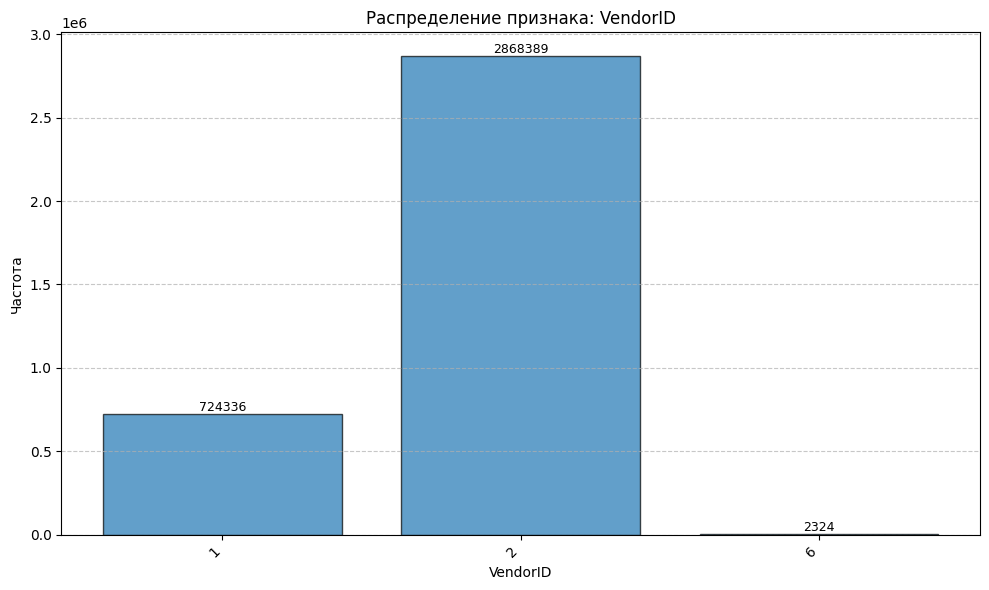

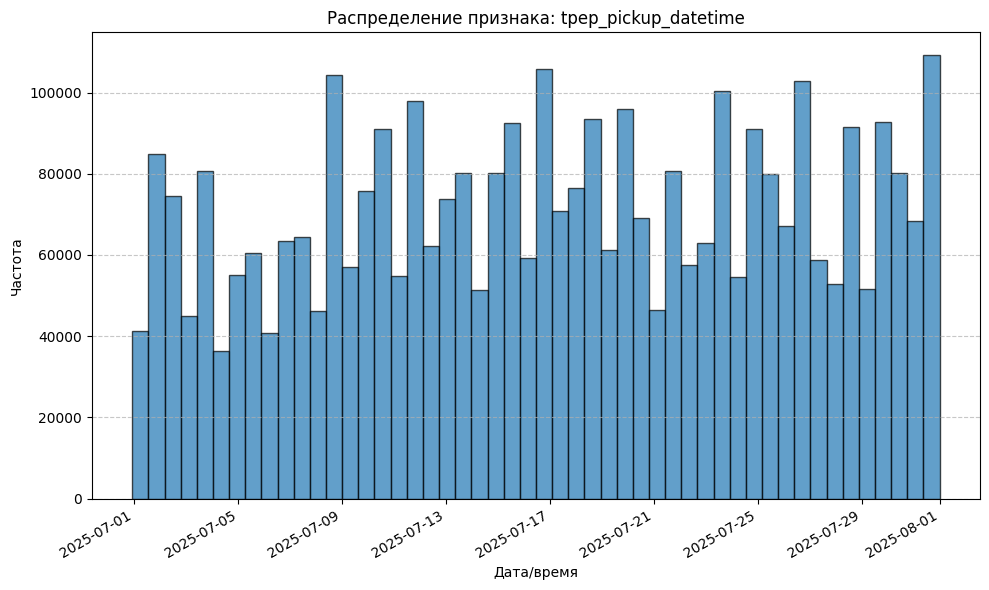

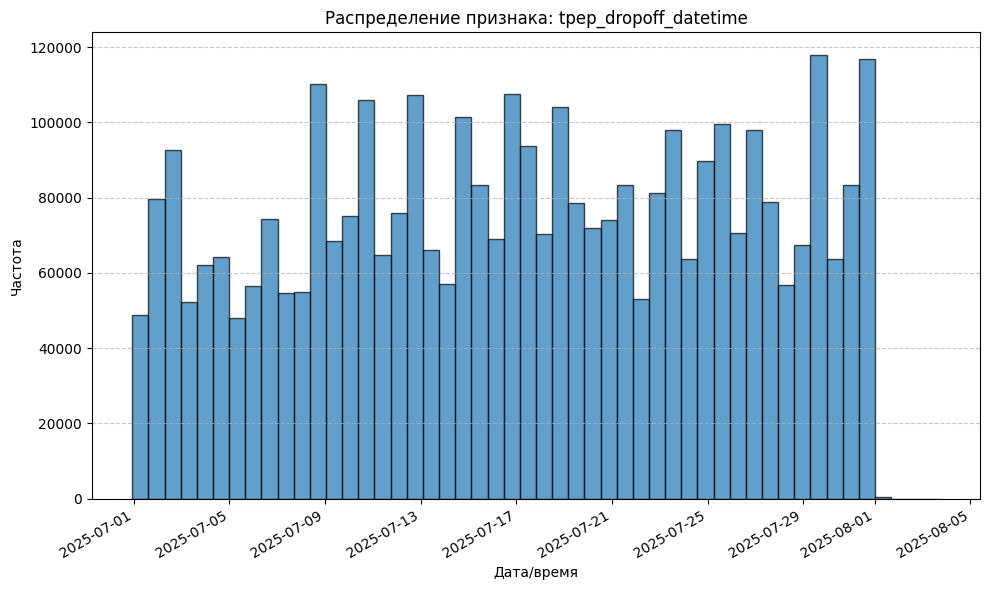

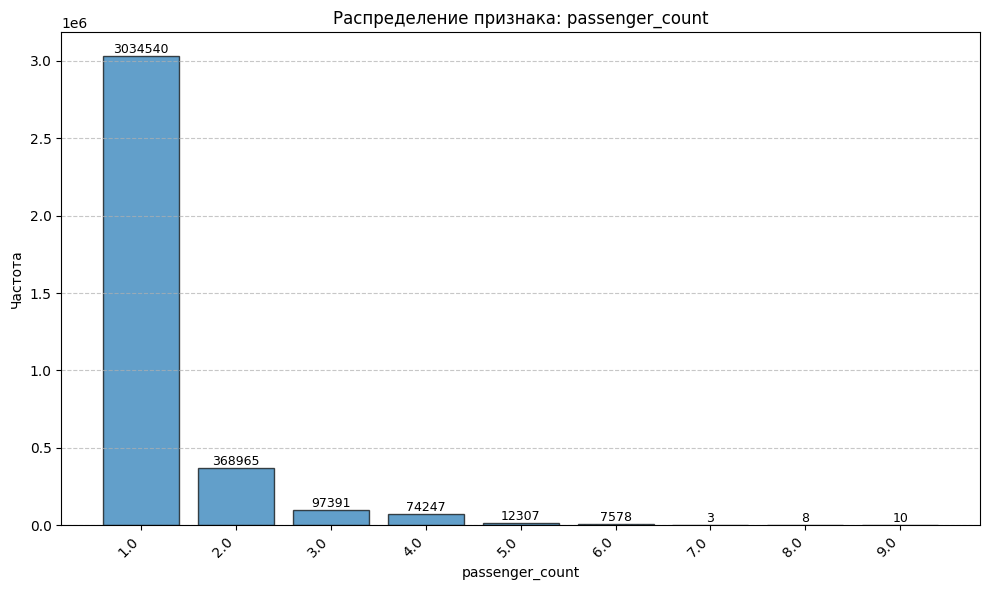

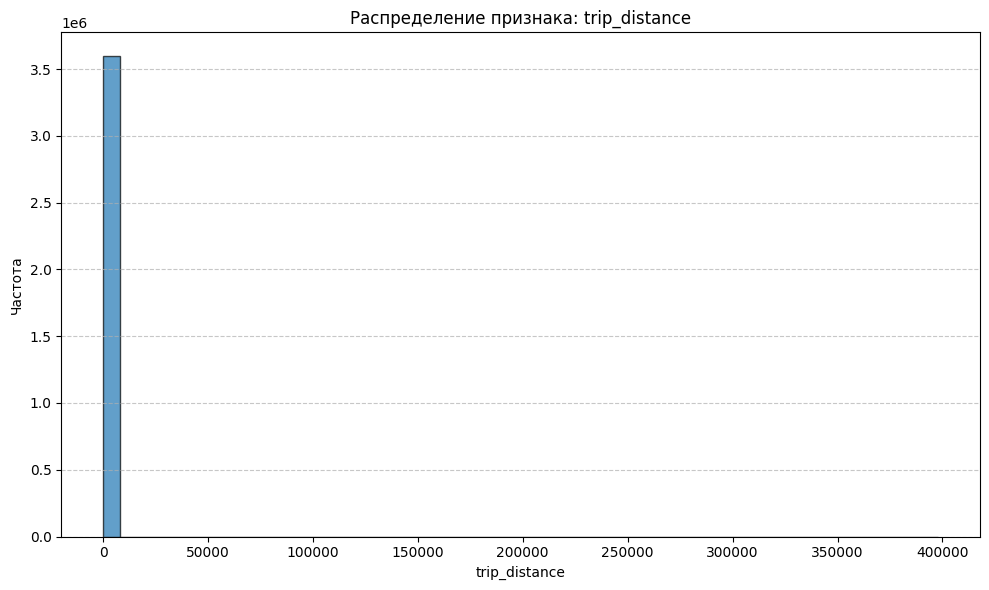

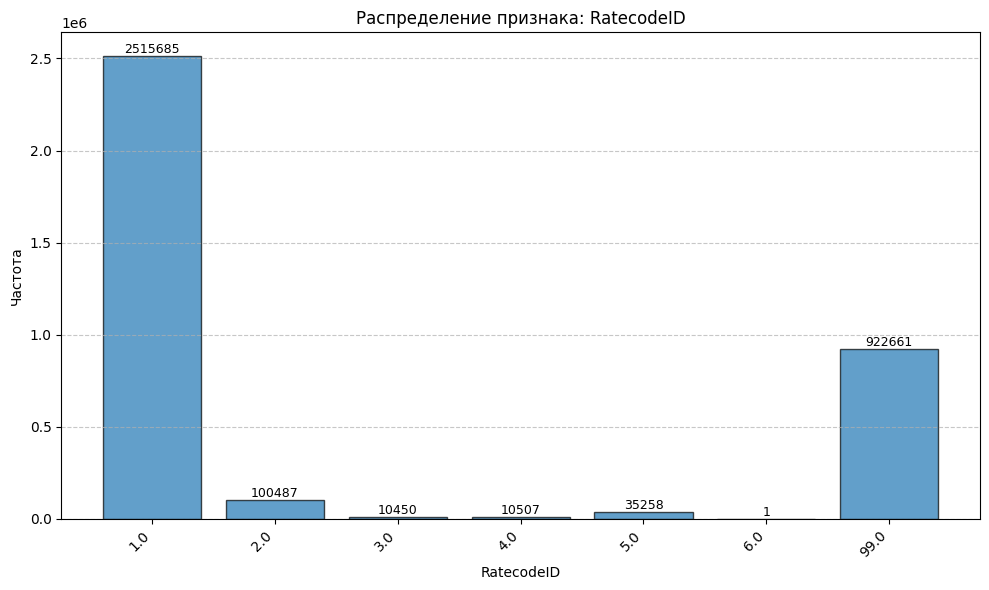

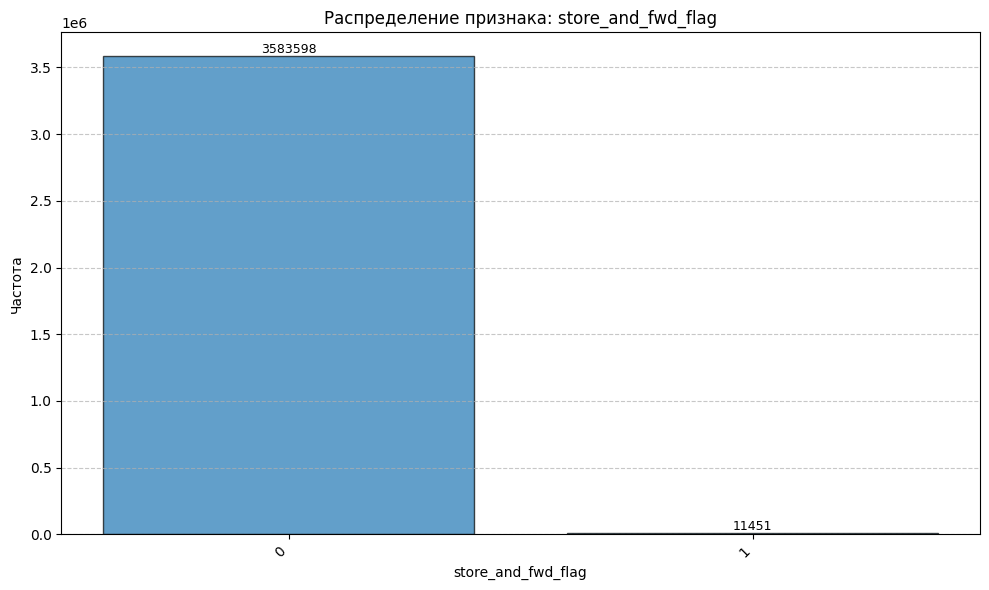

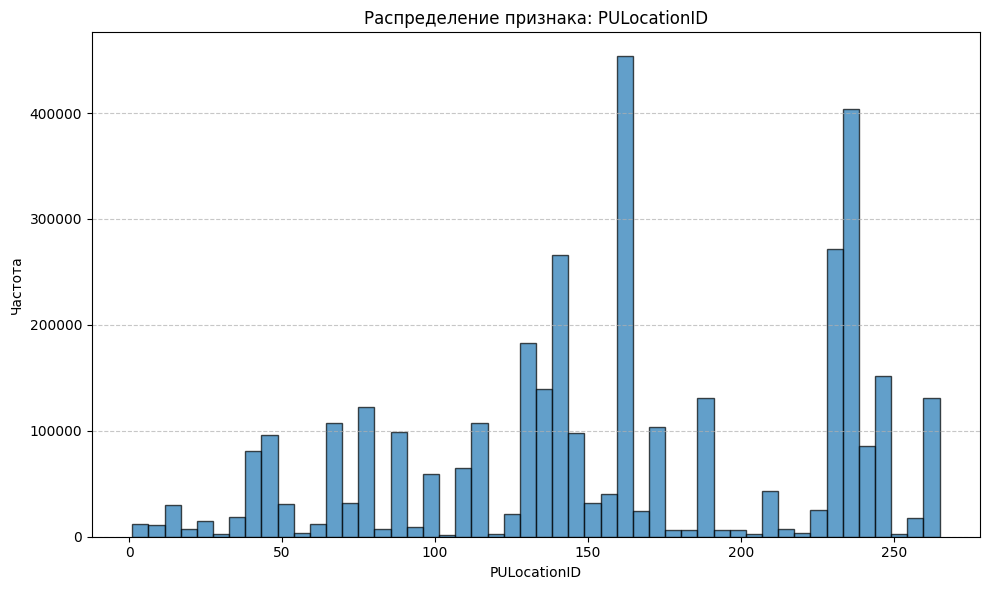

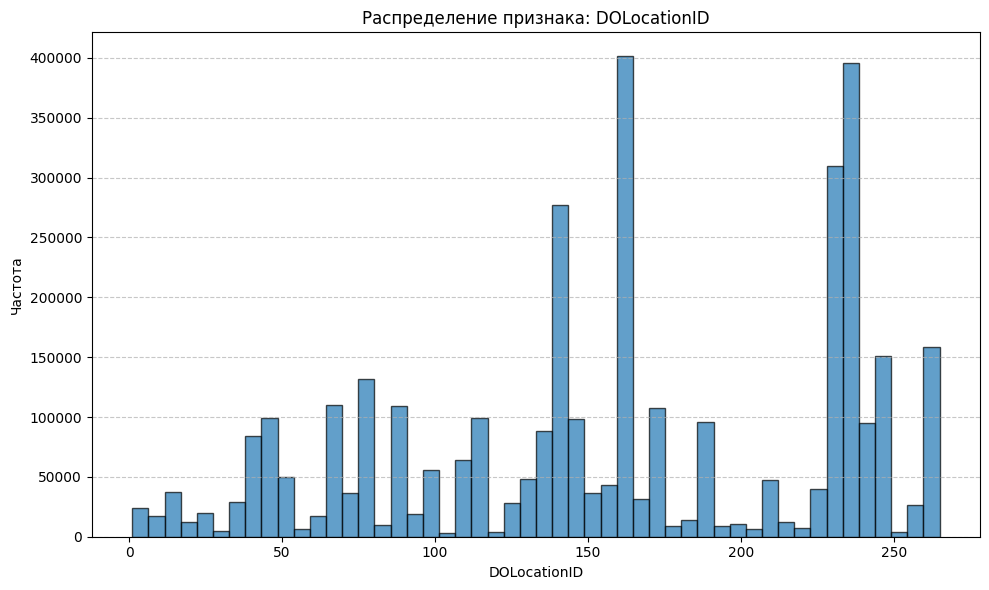

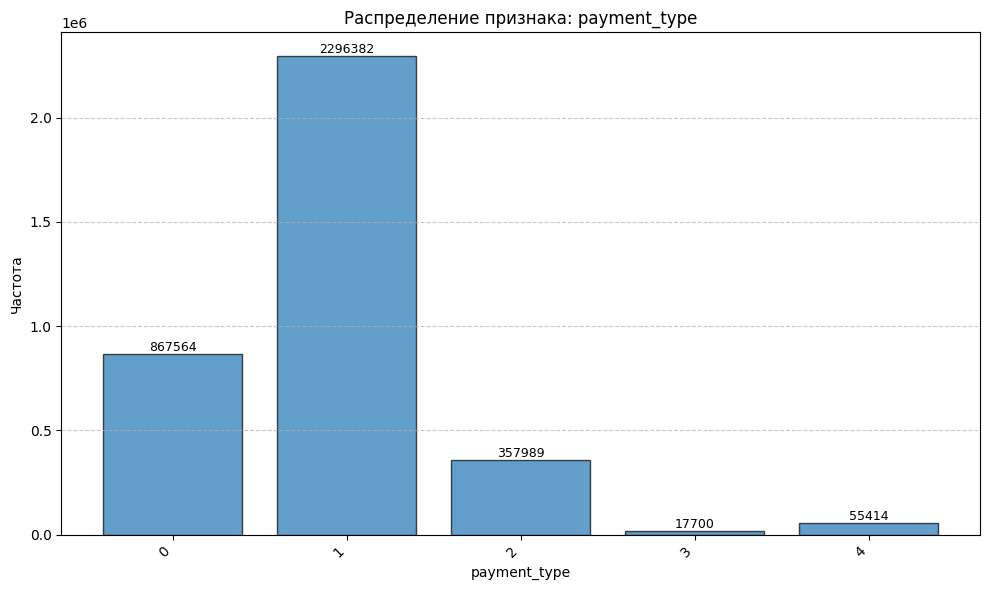

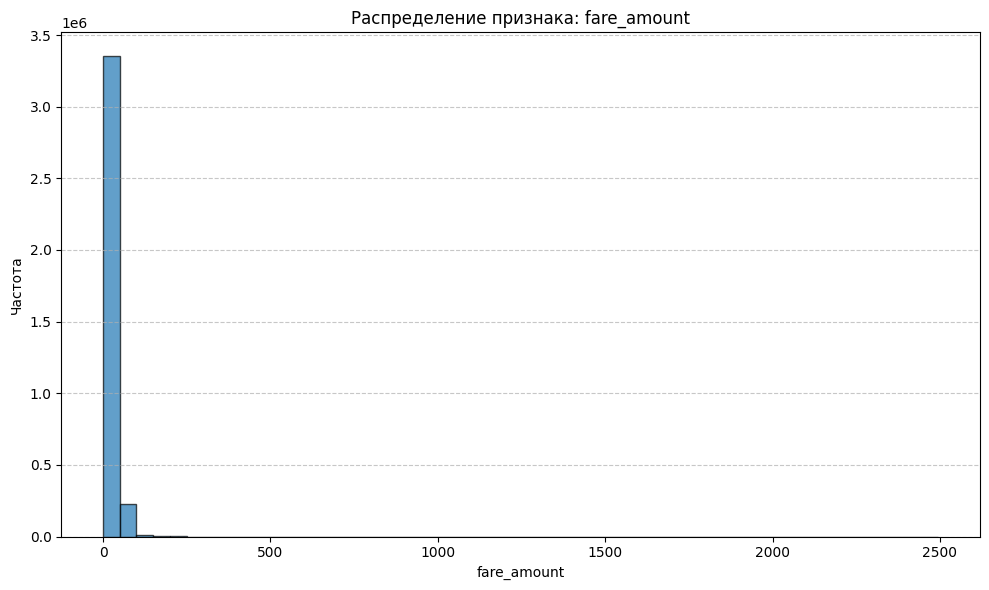

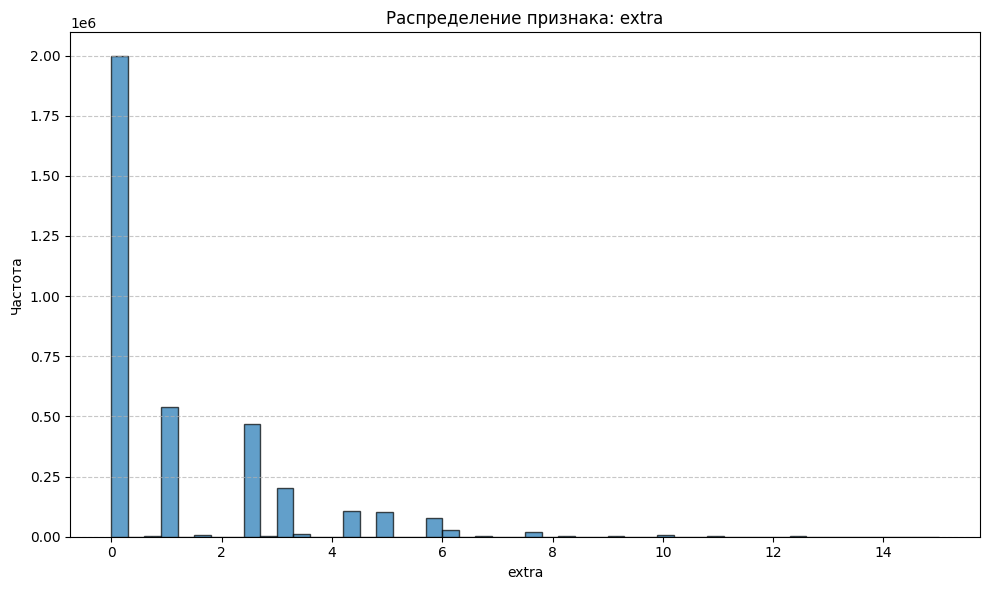

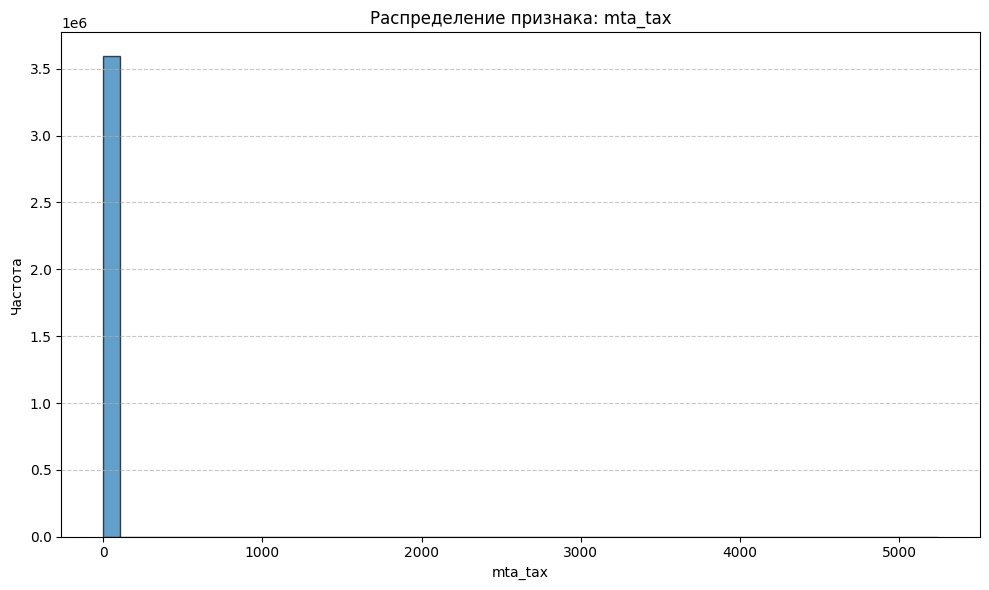

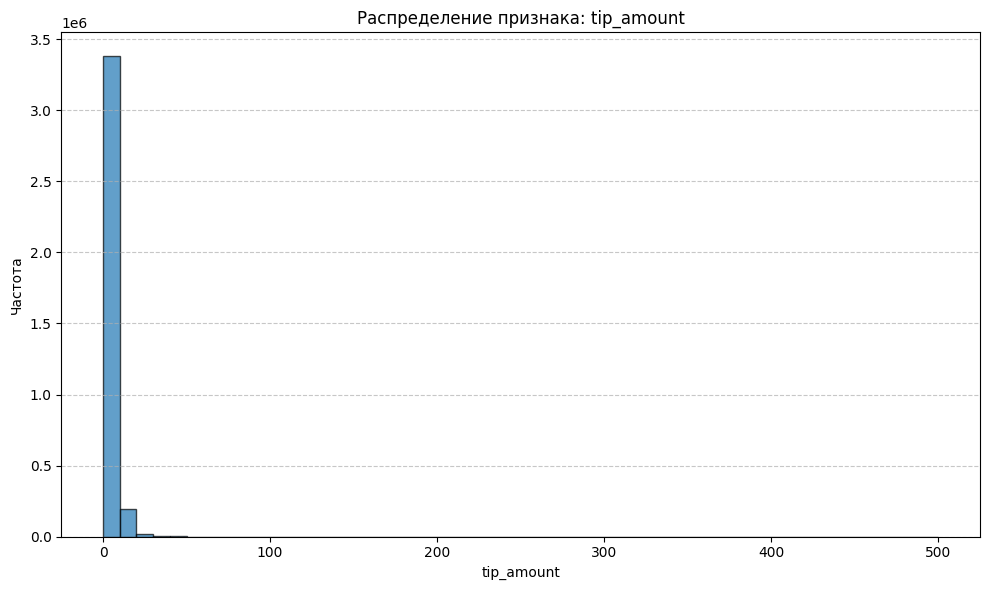

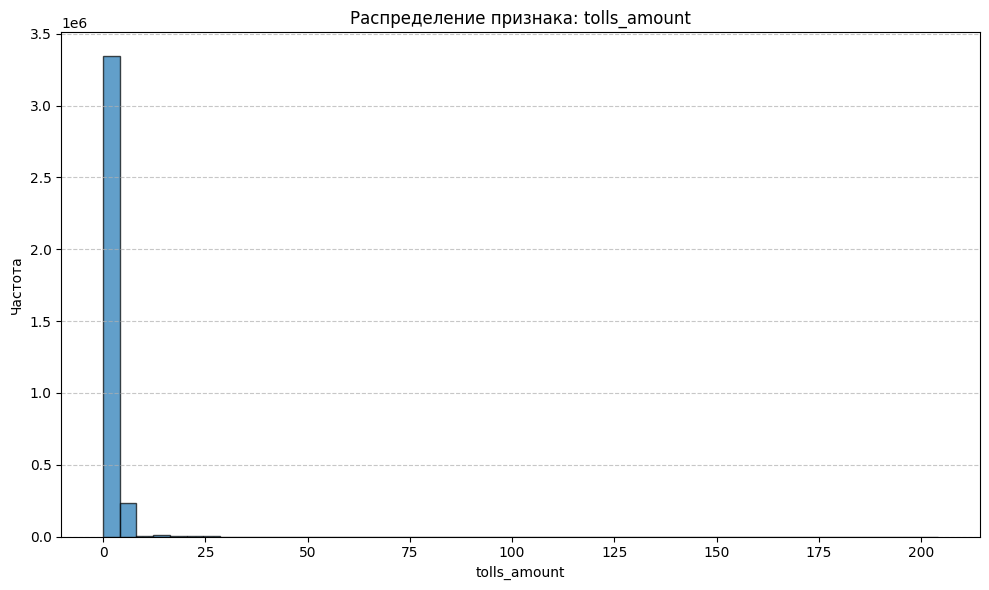

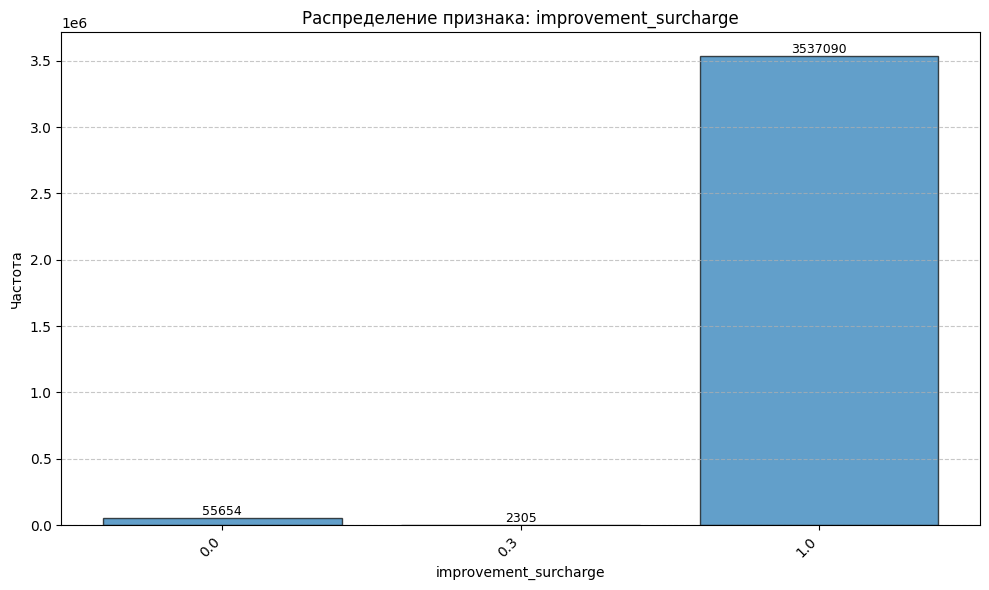

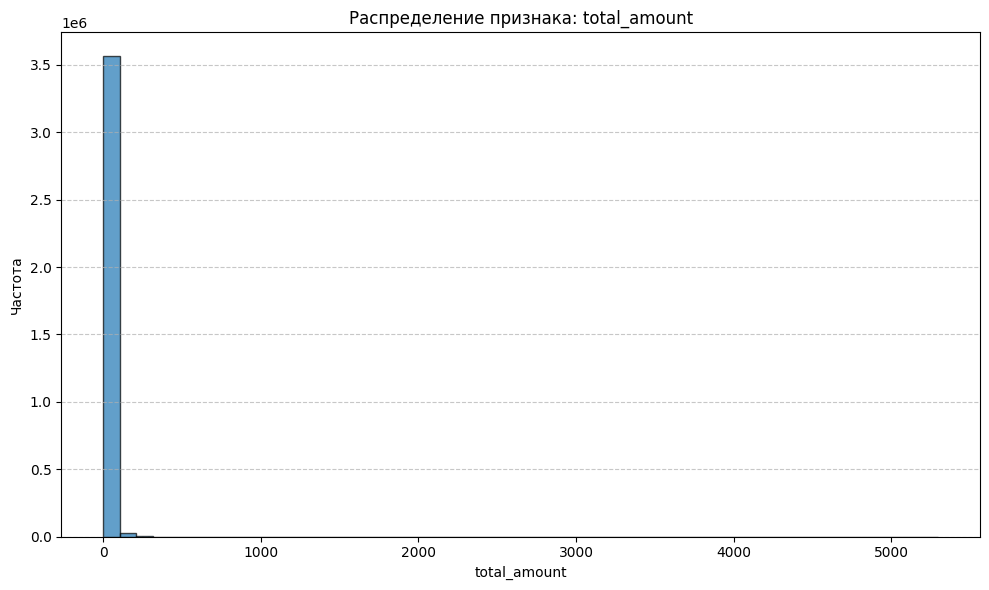

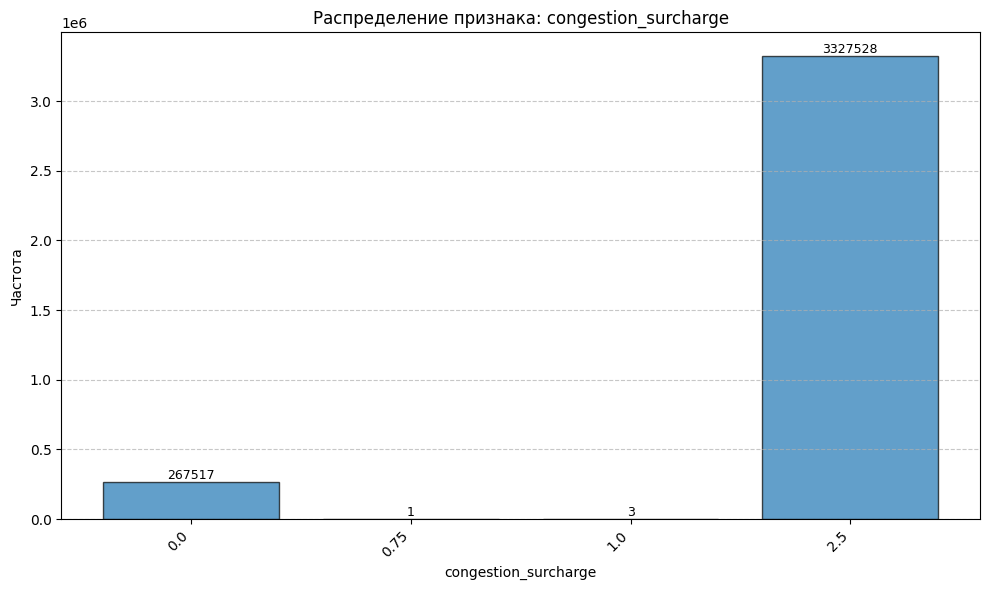

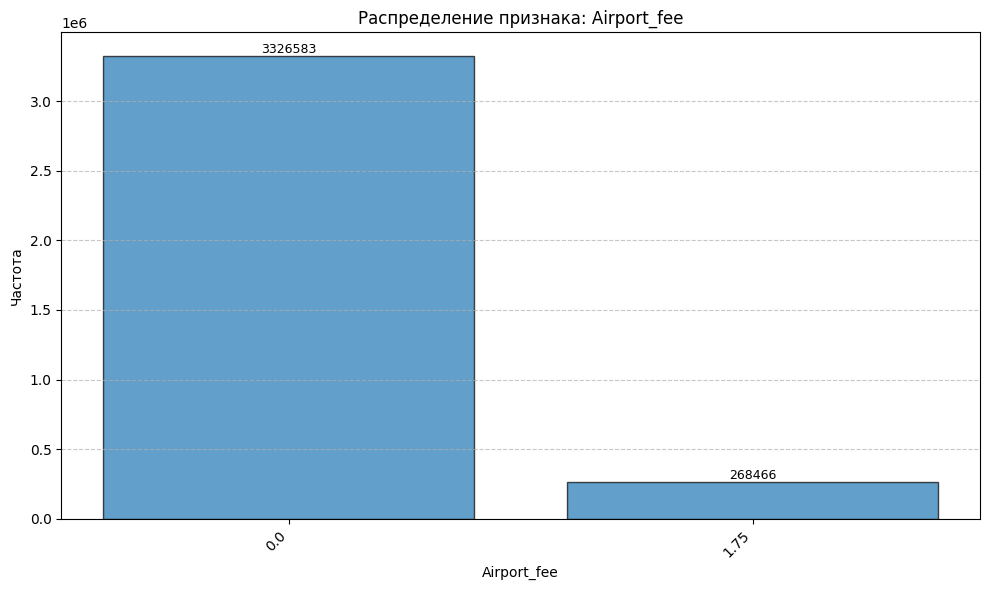

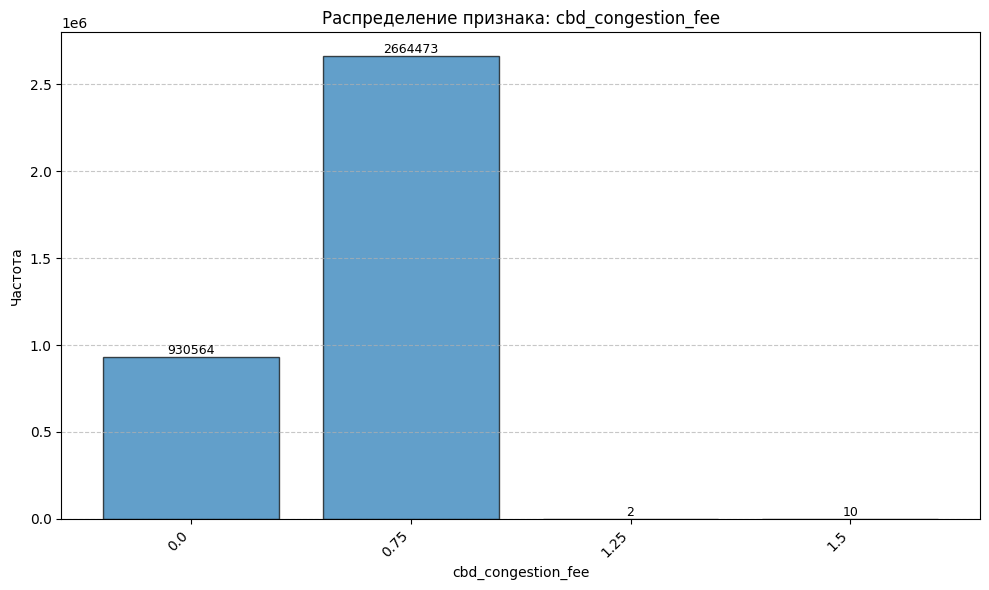

In [53]:
turn_on_graphs = True

if turn_on_graphs:
    for col in df.columns:
        plot_distribution(df[col], col)

And let's have a look at our descriptions again:

Data dictionary from the official [website](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page):

| Field Name | Description |
|------------|-------------|
| **VendorID** | A code indicating the TPEP provider that provided the record.<br>1 = Creative Mobile Technologies, LLC<br>2 = Curb Mobility, LLC<br>6 = Myle Technologies Inc<br>7 = Helix |
| **tpep_pickup_datetime** | The date and time when the meter was engaged. |
| **tpep_dropoff_datetime** | The date and time when the meter was disengaged. |
| **passenger_count** | The number of passengers in the vehicle. |
| **trip_distance** | The elapsed trip distance in miles reported by the taximeter. |
| **RatecodeID** | The final rate code in effect at the end of the trip.<br>1 = Standard rate<br>2 = JFK<br>3 = Newark<br>4 = Nassau or Westchester<br>5 = Negotiated fare<br>6 = Group ride<br>99 = Null/unknown |
| **store_and_fwd_flag** | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka "store and forward," because the vehicle did not have a connection to the server.<br>Y = store and forward trip<br>N = not a store and forward trip |
| **PULocationID** | TLC Taxi Zone in which the taximeter was engaged. |
| **DOLocationID** | TLC Taxi Zone in which the taximeter was disengaged. |
| **payment_type** | A numeric code signifying how the passenger paid for the trip.<br>0 = Flex Fare trip<br>1 = Credit card<br>2 = Cash<br>3 = No charge<br>4 = Dispute<br>5 = Unknown<br>6 = Voided trip |
| **fare_amount** | The time-and-distance fare calculated by the meter. For additional information on the following columns, see https://www.nyc.gov/site/tlc/passengers/taxi-fare.page |
| **extra** | Miscellaneous extras and surcharges. |
| **mta_tax** | Tax that is automatically triggered based on the metered rate in use. |
| **tip_amount** | Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| **tolls_amount** | Total amount of all tolls paid in trip. |
| **improvement_surcharge** | Improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
| **total_amount** | The total amount charged to passengers. Does not include cash tips. |
| **congestion_surcharge** | Total amount collected in trip for NYS congestion surcharge. |
| **airport_fee** | For pick up only at LaGuardia and John F. Kennedy Airports. |
| **cbd_congestion_fee** | Per-trip charge for MTA's Congestion Relief Zone starting Jan. 5, 2025. |

1) VendorID is not that interesting, although we can consider the idea of bringing the values to 0-1 scale, removing vendor 6.
2) pickup and dropoff time are kind of uniform, although there are some fluctuations.
3) Most trips have no more than 6 passengers, we should probably get rid of rides with more than 6, since these outliers could fiddle with the results.
4) Trip distance should be handled, there are some serious outliers.
5) Ratecode 6 should be looked into, maybe just remove the group ride
6) There are some very popular locations and others less popular, requires some research
7) Fares and tolls have some outliers
8) Improvement surcharge 0.3 could be a mistake, should be looked into
9) Congestion surcharge andcbd_congestion_fee also have some really rare values

### Many passengers

## Long rides

Let's take a look at ride durations.

In [54]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['duration_hours'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600

df_rides_longer_than_12 = df[df['duration_hours'] > 12]
df_rides_longer_than_6 = df[df['duration_hours'] > 6]
df_rides_longer_than_3 = df[df['duration_hours'] > 3]
df_rides_longer_than_2 = df[df['duration_hours'] > 2]
df_rides_longer_than_1 = df[df['duration_hours'] > 1]

In [55]:
print('12: ', df_rides_longer_than_12.shape)
print('6: ', df_rides_longer_than_6.shape)
print('3: ', df_rides_longer_than_3.shape)
print('2: ', df_rides_longer_than_2.shape)
print('1: ', df_rides_longer_than_1.shape)

12:  (793, 21)
6:  (925, 21)
3:  (1198, 21)
2:  (2379, 21)
1:  (63335, 21)


There are not that many rides longer than 2 hours, we can just remove them, since it is rare and may interfere with our insights

In [56]:
df = df[~(df['duration_hours'] > 2)]

In [57]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,duration_hours
count,3.592670e+06,3592670,3592670,3.592670e+06,3.592670e+06,3.592670e+06,3.592670e+06,3.592670e+06,3.592670e+06,3.592670e+06,...,3.592670e+06,3.592670e+06,3.592670e+06,3.592670e+06,3.592670e+06,3.592670e+06,3.592670e+06,3.592670e+06,3.592670e+06,3.592670e+06
mean,1.801219e+00,2025-07-17 04:37:16.602625,2025-07-17 04:54:13.510813,1.242937e+00,6.781103e+00,2.622642e+01,3.185931e-03,1.595794e+02,1.593466e+02,9.141207e-01,...,1.224500e+00,4.945375e-01,2.859192e+00,5.381549e-01,9.842670e-01,2.908770e+01,2.314686e+00,1.305392e-01,5.560155e-01,2.824745e-01
min,1.000000e+00,2025-06-30 22:15:24,2025-06-30 22:25:07,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.777778e-04
25%,2.000000e+00,2025-07-09 20:45:51.500000,2025-07-09 21:00:16,1.000000e+00,1.070000e+00,1.000000e+00,0.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,...,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.685000e+01,2.500000e+00,0.000000e+00,0.000000e+00,1.380556e-01
50%,2.000000e+00,2025-07-17 09:21:59,2025-07-17 09:40:14,1.000000e+00,1.900000e+00,1.000000e+00,0.000000e+00,1.610000e+02,1.610000e+02,1.000000e+00,...,0.000000e+00,5.000000e-01,2.000000e+00,0.000000e+00,1.000000e+00,2.226000e+01,2.500000e+00,0.000000e+00,7.500000e-01,2.263889e-01
75%,2.000000e+00,2025-07-24 19:23:00,2025-07-24 19:40:49,1.000000e+00,3.880000e+00,9.900000e+01,0.000000e+00,2.300000e+02,2.320000e+02,1.000000e+00,...,2.500000e+00,5.000000e-01,4.000000e+00,0.000000e+00,1.000000e+00,3.185000e+01,2.500000e+00,0.000000e+00,7.500000e-01,3.572222e-01
max,6.000000e+00,2025-07-31 23:59:59,2025-08-01 00:58:00,9.000000e+00,3.979944e+05,9.900000e+01,1.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,...,1.500000e+01,5.243380e+03,5.000000e+02,2.041800e+02,1.000000e+00,5.297870e+03,2.500000e+00,1.750000e+00,1.500000e+00,2.000000e+00
std,4.149217e-01,NaN,NaN,6.671742e-01,6.356826e+02,4.275572e+01,5.635408e-02,6.603387e+01,7.050444e+01,7.013981e-01,...,1.810819e+00,2.766726e+00,3.991310e+00,2.121327e+00,1.239005e-01,2.216639e+01,6.549376e-01,4.597860e-01,3.284233e-01,2.185168e-01


Let's also take a look at the distances, since there are quite long rides.

In [58]:
df_rides_further_than_1000 = df[df['trip_distance'] > 1000]
df_rides_further_than_500 = df[df['trip_distance'] > 500]
df_rides_further_than_200 = df[df['trip_distance'] > 200]
df_rides_further_than_100 = df[df['trip_distance'] > 100]
df_rides_further_than_50 = df[df['trip_distance'] > 50]
df_rides_further_than_30 = df[df['trip_distance'] > 30]
df_rides_further_than_10 = df[df['trip_distance'] > 10]

In [59]:
print('1000: ', df_rides_further_than_1000.shape)
print('500: ', df_rides_further_than_500.shape)
print('200: ', df_rides_further_than_200.shape)
print('100: ', df_rides_further_than_100.shape)
print('50: ', df_rides_further_than_50.shape)
print('30: ', df_rides_further_than_30.shape)
print('10: ', df_rides_further_than_10.shape)

1000:  (145, 21)
500:  (145, 21)
200:  (147, 21)
100:  (156, 21)
50:  (591, 21)
30:  (3669, 21)
10:  (292838, 21)


Rides longer than 50 miles are quite rare, so let's remove those (since New York City overall is not that long of a place)

In [60]:
df = df[~(df['trip_distance'] > 50)]

Let's actually look at the longer rides

In [61]:
df_rides_further_than_30 = df[df['trip_distance'] > 30]

In [62]:
df_rides_further_than_30.head(30)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,duration_hours
1051,2,2025-07-01 00:51:14,2025-07-01 01:27:42,1.0,32.50,3.0,0,138,1,1,...,6.00,0.0,5.00,28.00,1.0,178.15,0.0,1.75,0.00,0.607778
1317,2,2025-07-01 00:23:53,2025-07-01 01:09:44,1.0,34.88,4.0,0,132,265,1,...,1.00,0.0,37.81,6.94,1.0,228.60,0.0,1.75,0.00,0.764167
1357,2,2025-07-01 00:40:08,2025-07-01 01:27:48,4.0,33.75,4.0,0,132,265,1,...,1.00,0.5,0.00,0.00,1.0,189.95,0.0,1.75,0.00,0.794444
1944,2,2025-07-01 01:00:50,2025-07-01 01:46:10,1.0,36.00,4.0,0,138,265,1,...,6.00,0.5,0.00,0.00,1.0,216.65,0.0,1.75,0.00,0.755556
2155,2,2025-07-01 01:27:58,2025-07-01 02:12:59,1.0,39.30,4.0,0,132,265,1,...,1.00,0.5,30.00,6.94,1.0,301.09,0.0,1.75,0.00,0.750278
2160,2,2025-07-01 01:13:32,2025-07-01 02:19:42,3.0,46.25,4.0,0,132,265,1,...,1.00,0.5,61.30,0.00,1.0,369.55,0.0,1.75,0.00,1.102778
2196,2,2025-07-01 01:48:19,2025-07-01 02:27:50,4.0,32.28,4.0,0,132,265,1,...,1.00,0.5,15.00,0.00,1.0,199.35,0.0,1.75,0.00,0.658611
2318,1,2025-07-01 01:55:39,2025-07-01 02:52:48,1.0,35.80,5.0,0,132,265,1,...,2.50,0.0,30.00,21.00,1.0,249.50,0.0,1.75,0.75,0.952500
2510,2,2025-07-01 01:11:09,2025-07-01 01:57:49,1.0,31.48,4.0,0,132,265,1,...,1.00,0.0,5.00,21.00,1.0,149.00,0.0,1.75,0.75,0.777778
2802,2,2025-07-01 02:41:58,2025-07-01 03:29:51,2.0,34.72,4.0,0,132,265,1,...,1.00,0.5,44.57,0.00,1.0,267.42,0.0,1.75,0.00,0.798056


In [63]:
df_rides_further_than_30.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,duration_hours
count,3078.000000,3078,3078,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,...,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.00000,3078.000000,3078.000000,3078.000000,3078.000000
mean,1.845679,2025-07-16 22:57:42.416504,2025-07-17 00:02:31.649772,1.470760,35.996598,11.640676,0.002599,136.670565,220.384665,1.236192,...,1.378090,0.266569,17.511436,12.145042,0.986680,203.29037,0.480019,1.286062,0.179094,1.080343
min,1.000000,2025-07-01 00:23:53,2025-07-01 01:09:44,1.000000,30.010000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.76000,0.000000,0.000000,0.000000,0.002778
25%,2.000000,2025-07-09 13:58:54.500000,2025-07-09 15:22:42.500000,1.000000,31.935000,4.000000,0.000000,132.000000,255.250000,1.000000,...,0.000000,0.000000,0.000000,3.180000,1.000000,163.64250,0.000000,0.000000,0.000000,0.859722
50%,2.000000,2025-07-16 20:16:17.500000,2025-07-16 21:15:48.500000,1.000000,34.790000,4.000000,0.000000,132.000000,265.000000,1.000000,...,1.000000,0.500000,10.000000,6.940000,1.000000,203.42000,0.000000,1.750000,0.000000,1.027500
75%,2.000000,2025-07-24 20:36:49.500000,2025-07-24 21:37:05.250000,2.000000,38.650000,4.000000,0.000000,132.000000,265.000000,1.000000,...,1.750000,0.500000,34.250000,21.000000,1.000000,244.04750,0.000000,1.750000,0.000000,1.255833
max,2.000000,2025-07-31 23:47:19,2025-08-01 00:46:28,6.000000,50.000000,99.000000,1.000000,265.000000,265.000000,4.000000,...,12.500000,0.500000,131.000000,112.840000,1.000000,489.82000,2.500000,1.750000,0.750000,1.991667
std,0.361315,NaN,NaN,0.892111,4.967944,26.564058,0.050923,37.833607,88.741628,0.796745,...,2.003311,0.249491,19.537999,11.625950,0.114661,69.43124,0.984858,0.772558,0.319811,0.313418


The shortest duration for a ride further than 30 miles is 0.003 hours. That is suspicious, but maybe it was just a cancelled ride. We shall account for such rides as well.

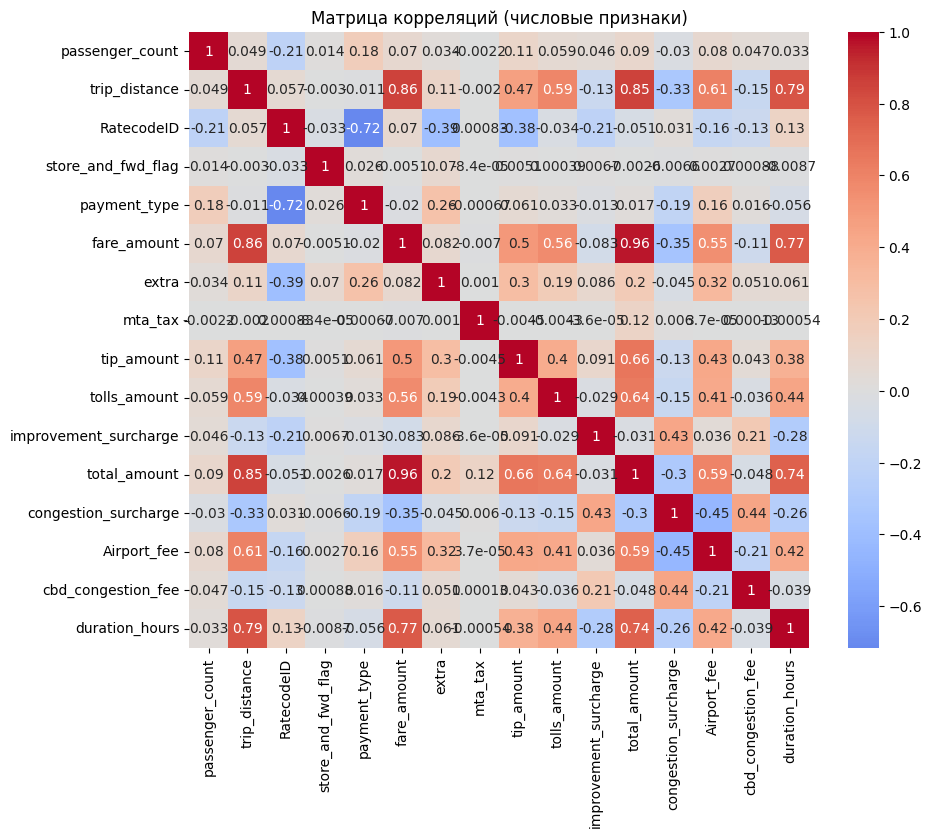

In [64]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций (числовые признаки)')
plt.show()